In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import RFECV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import datetime
from sklearn.model_selection import RandomizedSearchCV
import math
import pprint
import json
import scipy.stats
from sklearn.model_selection import train_test_split
import os
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
RANDOM_STATE = 42

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('data/train.csv')

In [5]:
test = pd.read_csv('data/test.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [7]:
len(data)

3000

In [8]:
len(test)

4398

In [9]:
data.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0477337,en,Red Dawn,"Air Force One is shot down by terrorists, leav...",NaN,/uYVheUBf8ITaocUP4Og9GXxOMIH.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Black Sheep,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe44c3c3a36847f80a8a4f', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [10]:
data.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### Utility functions

functions use to decode and plot column with multiple values, such as genres, cast, crew, ...
and other functions

In [11]:
def encode(obj, col, x):  
    return obj in x[col]


In [12]:
def encode_array(df, col, select, filt=None, min_entries=None, list_entries=None, prefix=''):
    df[prefix + col + '_list'] = df[col].apply(lambda x: eval(x) if not pd.isnull(x) else [])
    df[prefix + col + '_list'] = [[(prefix + str(select(obj))) for obj in objs if (filt == None or filt(obj))] for objs in df[prefix + col + '_list']]
    obj_list = [item for sublist in list(df[prefix + col + '_list']) for item in sublist]
    obj_list = list(dict.fromkeys(map(lambda x: (x, obj_list.count(x)), obj_list)))
    
    if min_entries and not list_entries:
        obj_list = list(filter(lambda x: x[1] > min_entries, obj_list))
    
    if list_entries != None:
        obj_dict = {x[0]: x[1] for x in obj_list}
        obj_list = [(entry, obj_dict[entry] if entry in obj_dict else 0) for entry in list_entries]
    
    for obj in obj_list:
        df[obj[0]] = df.apply(partial(encode, obj[0], prefix + col + '_list'), axis=1)
    df['num_' + prefix + col] = df[prefix + col + '_list'].apply(lambda x: len(x))
    
    return obj_list
    

In [13]:
def scatterplot_columns(data, cols, y, title, rotate_xticks=False):
    plt.figure(figsize=(20,12))
    plt.title(title,fontsize=20)
    loc, labels = plt.xticks()
    plt.xticks(fontsize=12,rotation=90)
    rows = pd.DataFrame()
    for col in cols:
        with_col = data[data[col]].copy()
        with_col['col'] = col
        rows = rows.append(with_col)

    if rotate_xticks:
        plt.xticks(fontsize=12,rotation=90)
    sns.swarmplot(x='col', y=y, data=rows)    
    plt.show()
    


In [14]:
def barplot_columns(data, cols, y, title, rotate_xticks=False):
    plt.figure(figsize=(20,12))
    plt.title(title,fontsize=20)
    loc, labels = plt.xticks()
    plt.xticks(fontsize=12,rotation=90)
    rows = pd.DataFrame()
    for col in cols:
        with_col = data[data[col]].copy()
        with_col['col'] = col
        rows = rows.append(with_col)

    if rotate_xticks:
        plt.xticks(fontsize=12,rotation=90)
    sns.barplot(x='col', y=y, data=rows)    
    plt.show()

In [15]:
def plot_multivalue_column(data, col, select, Y=None, filt=None, min_entries=None, list_entries=None, scatterplot=True, barplot=True, countplot=True, num_countplot=True, prefix=''):
    res = encode_array(data, col, select, filt, min_entries, list_entries, prefix=prefix)
    entries = [entry[0] for entry in res]
    
    if countplot:
        plt.figure(figsize=(20,12))
        sns.barplot(x=[entry[0] for entry in res], y=[entry[1] for entry in res])
        plt.title("Movies by {}".format(col),fontsize=20)
        loc, labels = plt.xticks()
        plt.xticks(fontsize=12,rotation=90)
        plt.show()
        
    if scatterplot and Y != None:
        scatterplot_columns(data, entries, Y, '{} by {}'.format(Y, col), True)

    if barplot and Y != None:
        barplot_columns(data, entries, Y, '{} by {}'.format(Y, col), True)

        plt.figure(figsize=(20,12))
        sns.barplot(x='num_{}'.format(col), y=Y, data=data)
        plt.title("{} by num {}".format(Y, col),fontsize=20)
        loc, labels = plt.xticks()
        plt.xticks(fontsize=12,rotation=90)
        plt.show()
    
    if num_countplot:            
        plt.figure(figsize=(20,12))
        sns.countplot(x=('num_{}{}').format(prefix, 
                                             col), data=data)
        plt.title("{} by num".format(col),fontsize=20)
        loc, labels = plt.xticks()
        plt.xticks(fontsize=12,rotation=90)
        plt.show()

    
    return entries
    

## Revenue

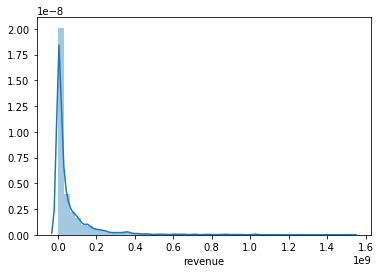

In [16]:
sns.distplot(data['revenue'])

Very skewed distrubtion

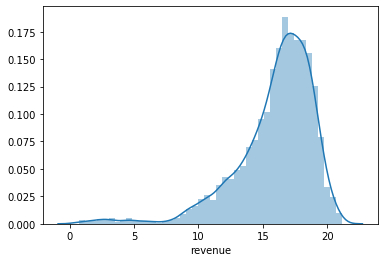

In [17]:
sns.distplot(data['revenue'].apply(np.log1p))

Better distrubution which isnt as skewed

A non skewed modell will make it easier for the models to predict correctly

## Saving attributes we want to use

In [18]:
attributes = []

## Title vs original title

In [19]:
data['title_same'] = data['original_title'] == data['title']

In [20]:
test['title_same'] = test['original_title'] == test['title']

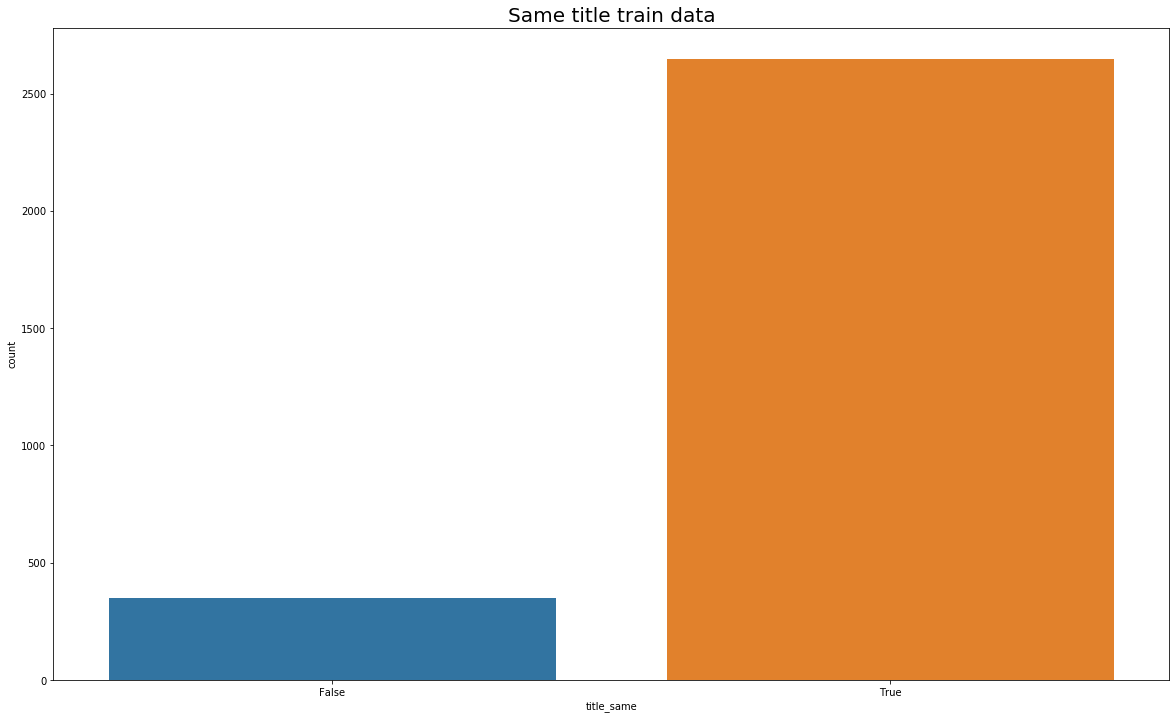

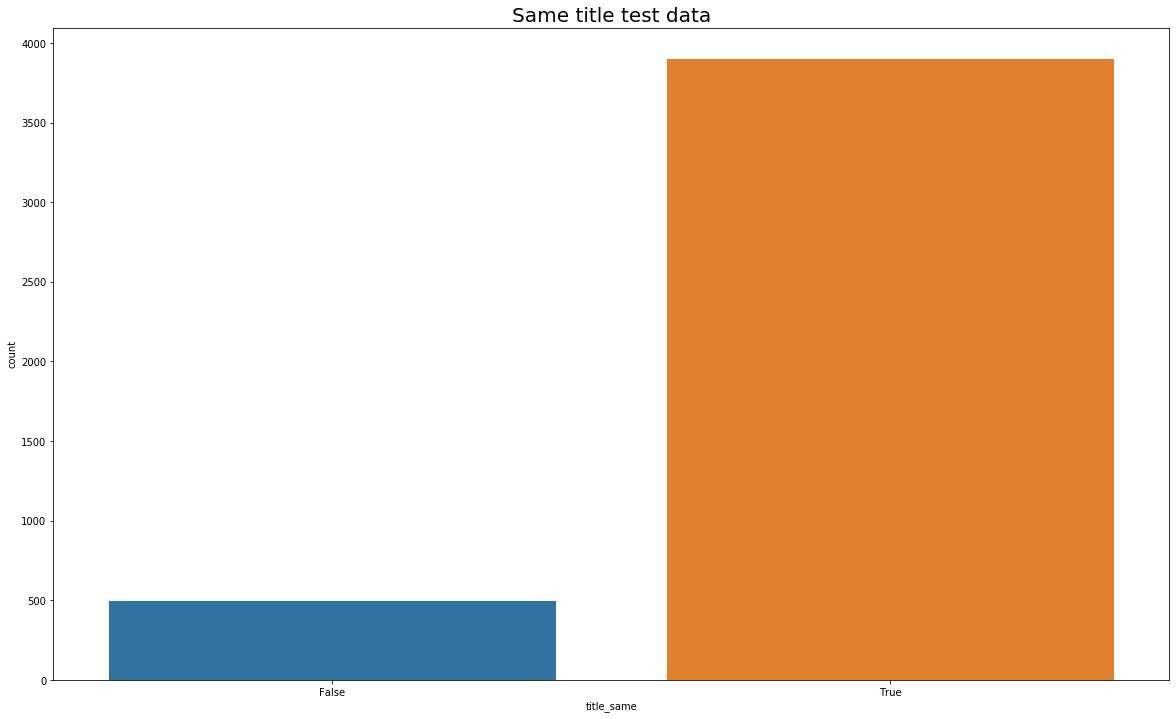

In [21]:
plt.figure(figsize=(20,12))
sns.countplot(x=('title_same'), data=data)
plt.title("Same title train data",fontsize=20)
plt.show()
plt.figure(figsize=(20,12))
sns.countplot(x=('title_same'), data=test)
plt.title("Same title test data",fontsize=20)
plt.show()

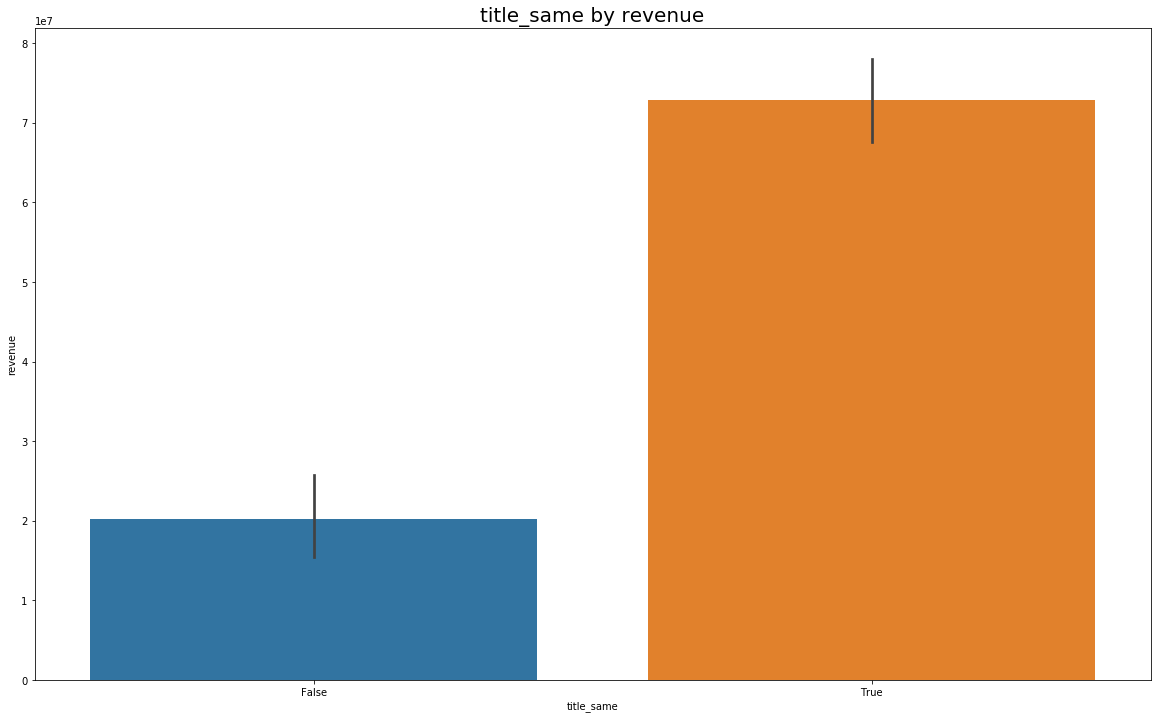

In [22]:
plt.figure(figsize=(20,12))
sns.barplot(x='title_same', y='revenue', data=data)
plt.title("title_same by revenue",fontsize=20)
plt.show()

In [23]:
attributes.append('title_same')

## Homepage

In [24]:
data['has_homepage'] = data['homepage'].notnull()

In [25]:
test['has_homepage'] = test['homepage'].notnull()

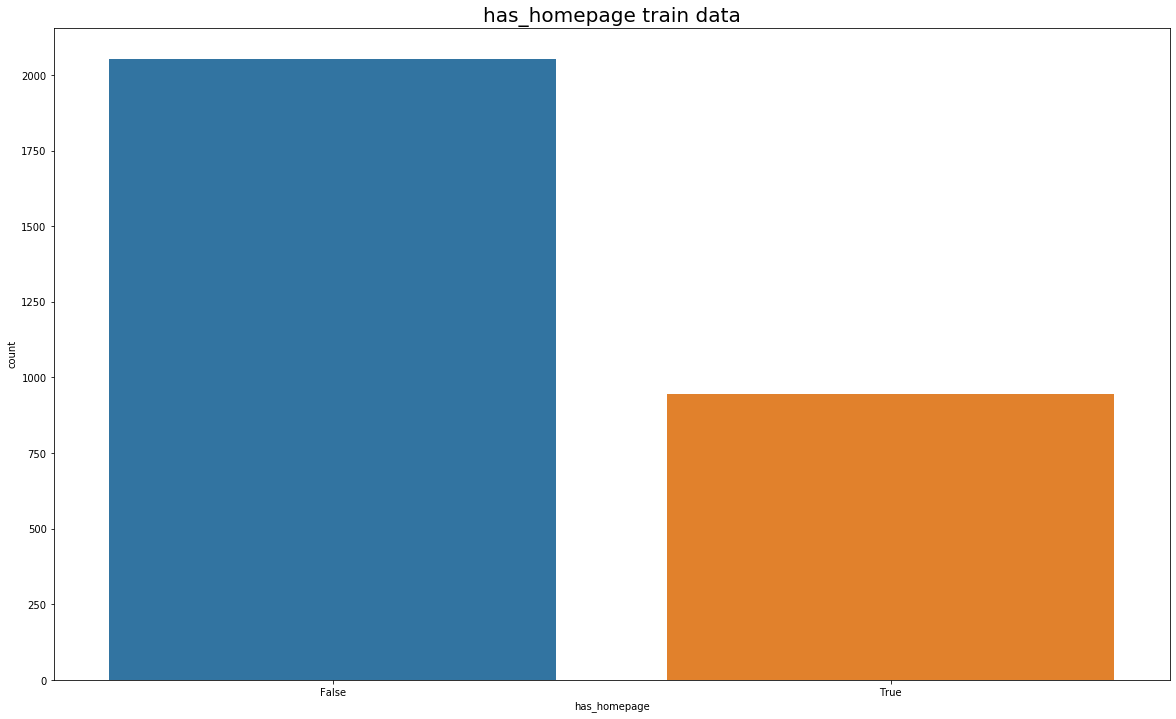

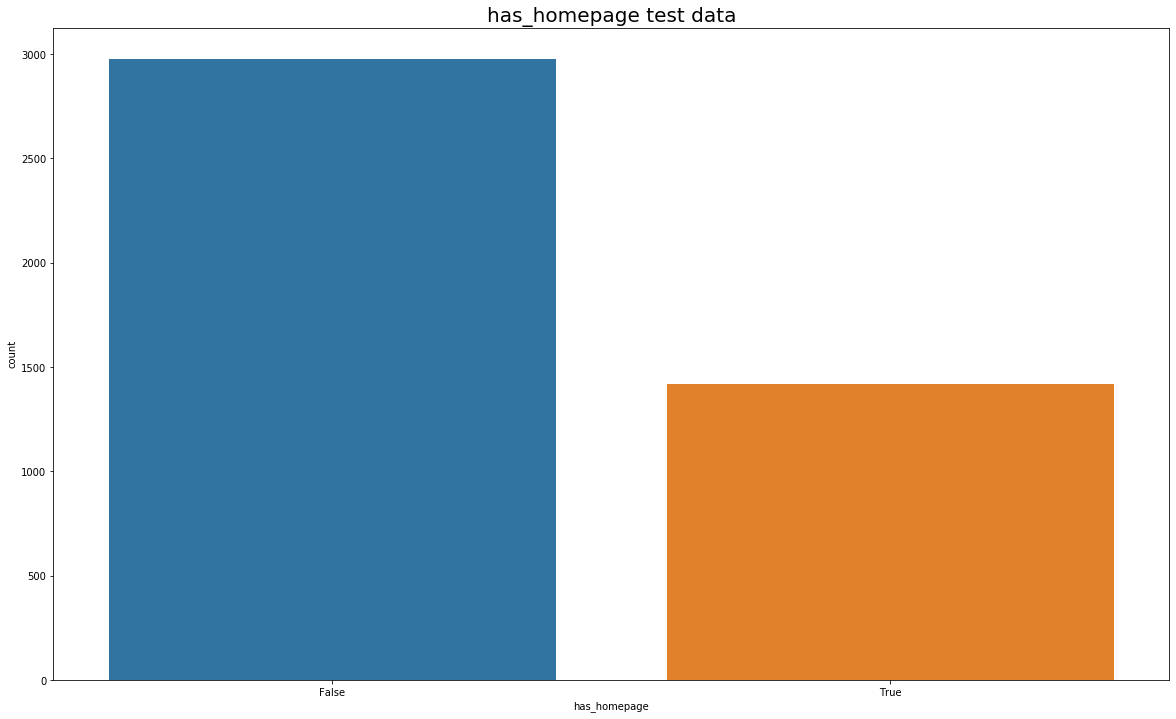

In [26]:
plt.figure(figsize=(20,12))
sns.countplot(x=('has_homepage'), data=data)
plt.title("has_homepage train data",fontsize=20)
plt.show()
plt.figure(figsize=(20,12))
sns.countplot(x=('has_homepage'), data=test)
plt.title("has_homepage test data",fontsize=20)
plt.show()

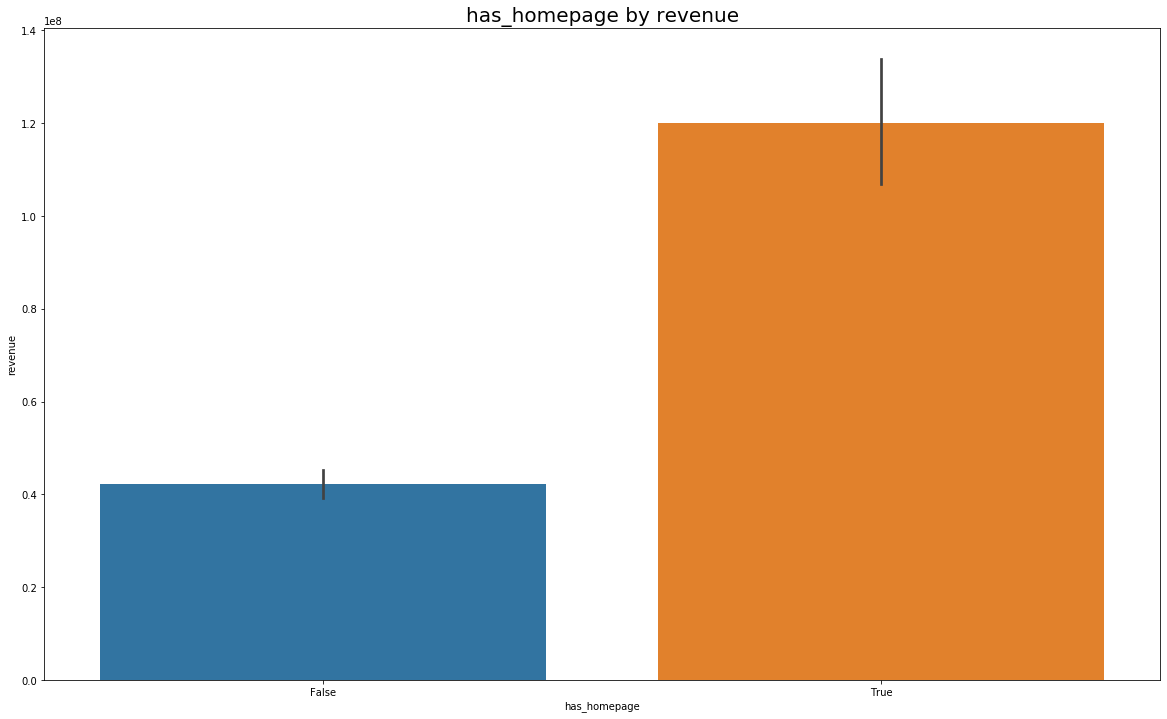

In [27]:
plt.figure(figsize=(20,12))
sns.barplot(x='has_homepage', y='revenue', data=data)
plt.title("has_homepage by revenue",fontsize=20)
plt.show()

In [28]:
attributes.append('has_homepage')

## Collection

In [29]:
data['is_collection'] = data['belongs_to_collection'].notnull()

In [30]:
test['is_collection'] = test['belongs_to_collection'].notnull()

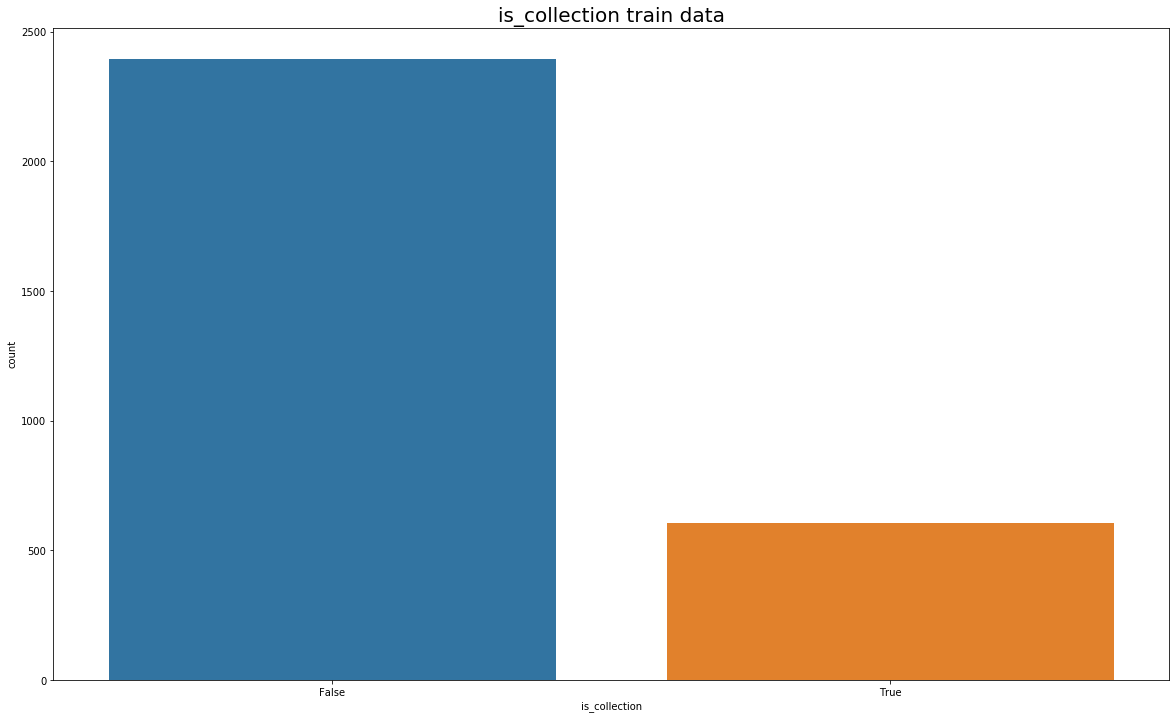

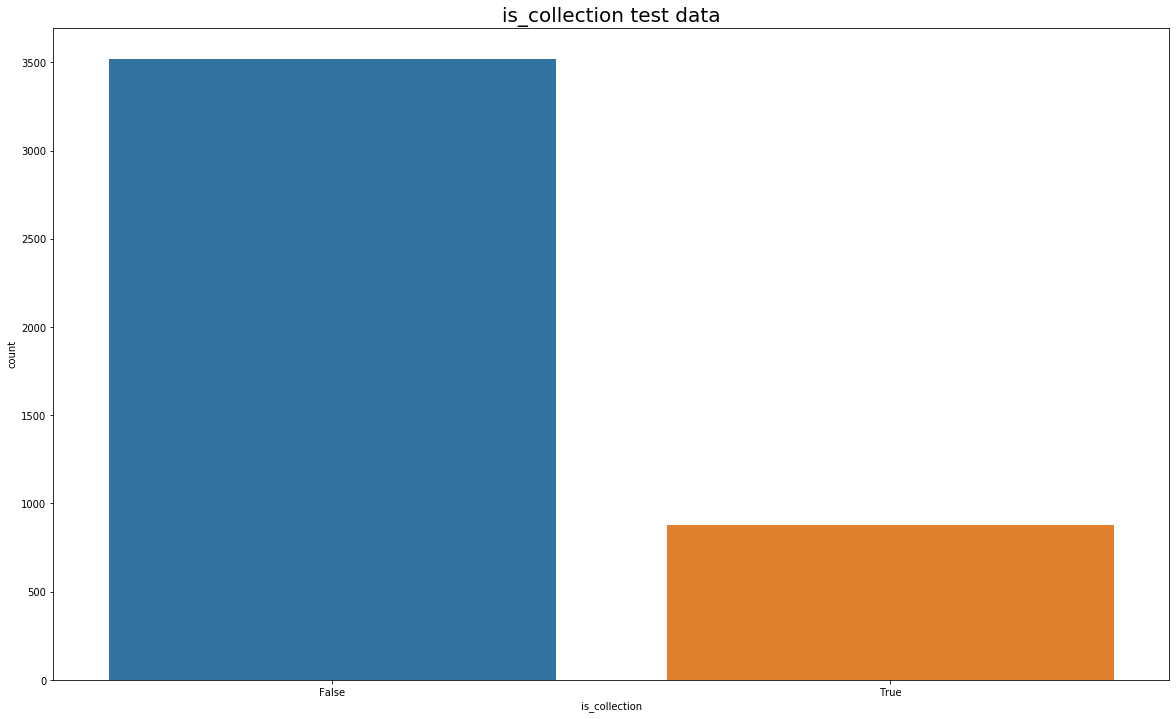

In [31]:
plt.figure(figsize=(20,12))
sns.countplot(x=('is_collection'), data=data)
plt.title("is_collection train data",fontsize=20)
plt.show()
plt.figure(figsize=(20,12))
sns.countplot(x=('is_collection'), data=test)
plt.title("is_collection test data",fontsize=20)
plt.show()

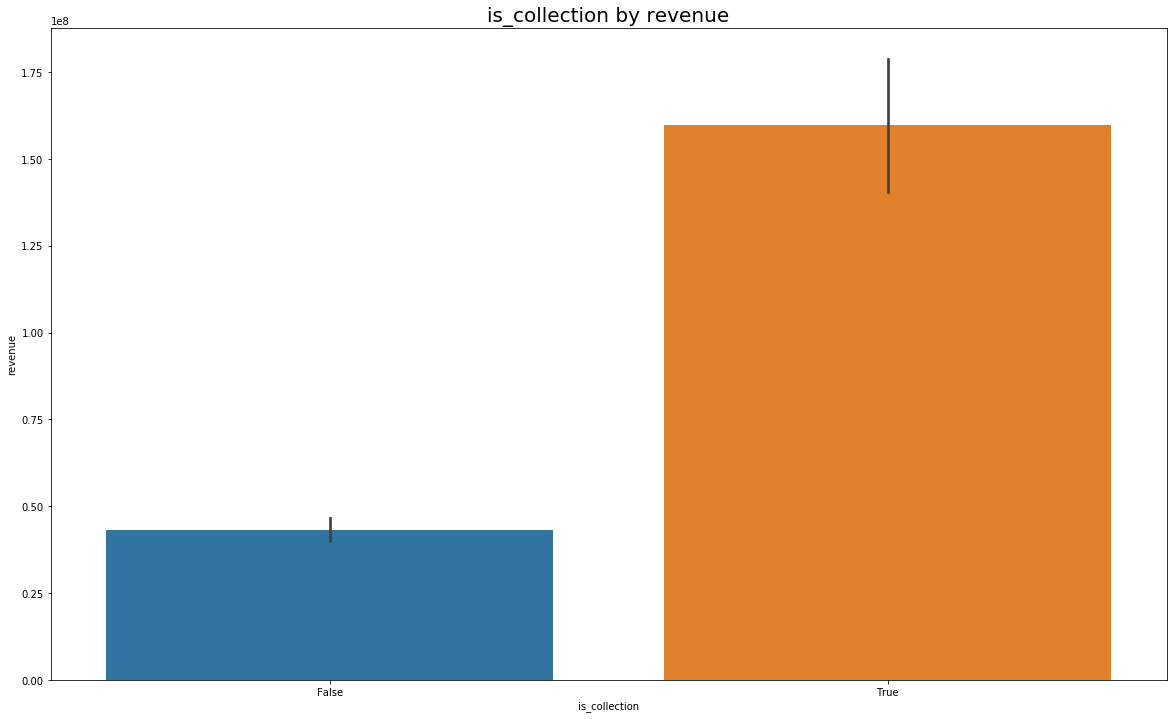

In [32]:
plt.figure(figsize=(20,12))
sns.barplot(x='is_collection', y='revenue', data=data)
plt.title("is_collection by revenue",fontsize=20)
plt.show()

In [33]:
attributes.append('is_collection')

## Runtime

In [34]:
data[data['runtime'].isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,title_same,has_homepage,is_collection
1335,1336,NaN,6000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt1107828,ru,Королёв,NaN,0.292296,/2XcRiIvliLUUGqv5qOvpc76WeCU.jpg,NaN,NaN,10/29/07,NaN,NaN,Released,NaN,Королёв,NaN,"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",31000,True,False,False
2302,2303,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0116485,de,Happy Weekend,NaN,0.002229,NaN,"[{'name': 'Senator Film Produktion', 'id': 191}]","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",3/14/96,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,"[{'id': 572, 'name': 'sex'}, {'id': 596, 'name...","[{'cast_id': 0, 'character': 'Joachim Krippo',...",NaN,65335,True,False,False


In [35]:
test[test['runtime'].isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,title_same,has_homepage,is_collection
243,3244,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0082131,es,La caliente niña Julietta,NaN,0.000464,/6ANZPgGGzplpAUuqx97nmAtmgEH.jpg,"[{'name': 'IFI Producción S.A.', 'id': 16675}]","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",3/20/81,NaN,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,La caliente niña Julietta,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","[{'cast_id': 7, 'character': 'Julietta Santigo...","[{'credit_id': '55678cf992514156b600069f', 'de...",True,False,False
1489,4490,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt3132094,es,"Pancho, el perro millonario",NaN,0.661399,/h1n1RXda54WmuFmrcPU7iXZN0ta.jpg,"[{'name': 'Atresmedia Cine', 'id': 29566}, {'n...","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",6/6/14,NaN,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,"Pancho, el perro millonario","[{'id': 11493, 'name': 'animal as human'}, {'i...","[{'cast_id': 3, 'character': 'Alberto', 'credi...","[{'credit_id': '52fe4e1c9251416c91126d43', 'de...",True,False,False
1632,4633,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0078010,es,Nunca en horas de clase,NaN,0.281500,/wVDY6zJV5GCkZF07CMYE8s37Rx7.jpg,"[{'name': 'Films Zodíaco', 'id': 36421}]","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",11/3/78,NaN,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Nunca en horas de clase,"[{'id': 107, 'name': 'barcelona spain'}, {'id'...","[{'cast_id': 6, 'character': 'Susy', 'credit_i...","[{'credit_id': '544d2dd20e0a2608c2002879', 'de...",True,False,False
3817,6818,NaN,0,NaN,NaN,tt2192844,fi,Miesten välisiä keskusteluja,NaN,0.011427,/iGykvX2LgYFz9EKAjqGoni9xmCf.jpg,"[{'name': 'Vegetarian Films', 'id': 80999}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1/4/13,NaN,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,NaN,Miesten välisiä keskusteluja,NaN,"[{'cast_id': 0, 'character': 'Kari Mairisaari'...","[{'credit_id': '57cad03a9251411ac50030a1', 'de...",True,False,False


In [36]:
median = data['runtime'].append(test['runtime']).median()

In [37]:
data.loc[data['runtime'].isnull(), 'runtime'] = median

In [38]:
test.loc[test['runtime'].isnull(), 'runtime'] = median

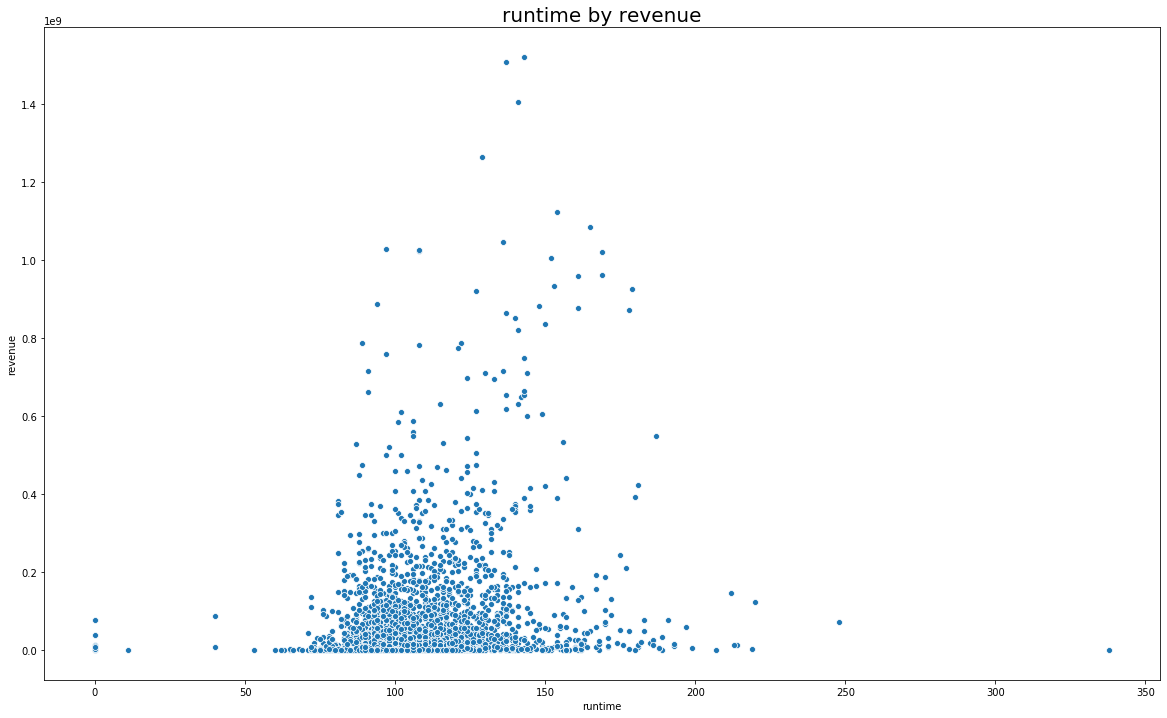

In [39]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='runtime', y='revenue', data=data)
plt.title("runtime by revenue",fontsize=20)
plt.show()

In [40]:
attributes.append('runtime')

## Keywords

In [41]:
data.head(5)['Keywords']

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                  NaN
Name: Keywords, dtype: object

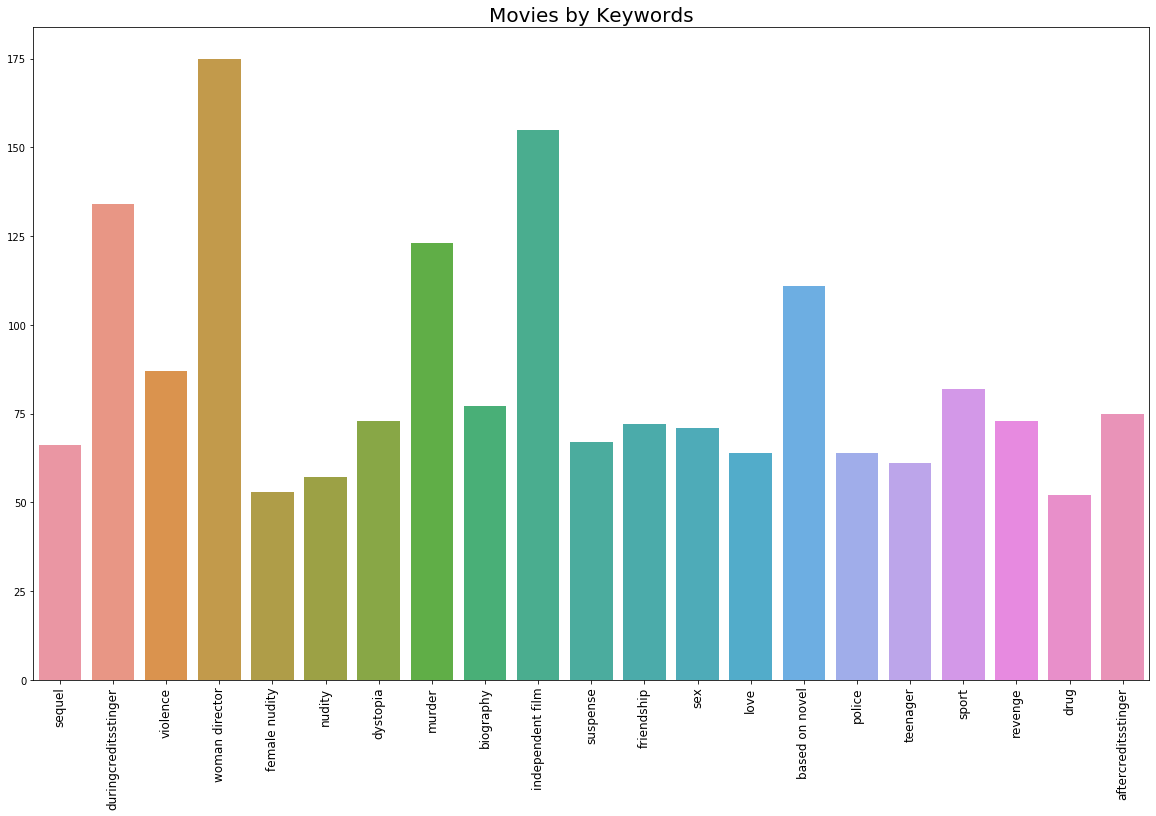

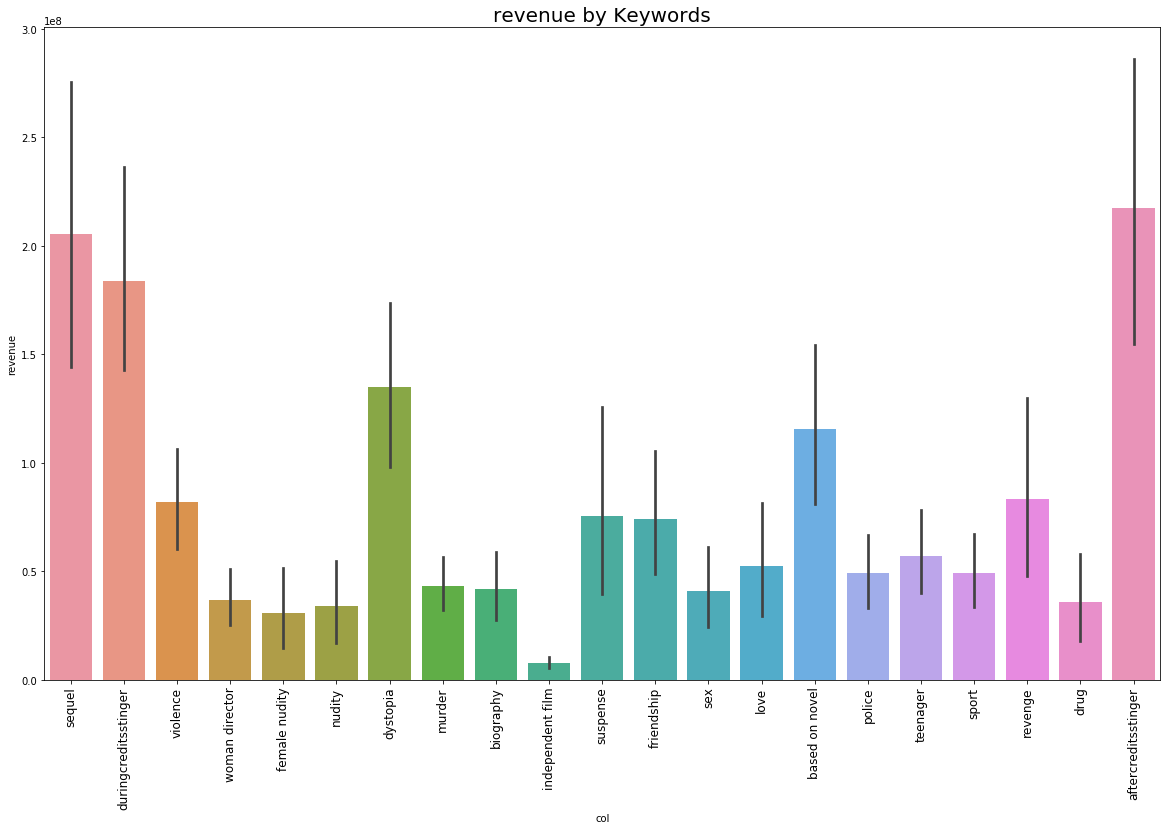

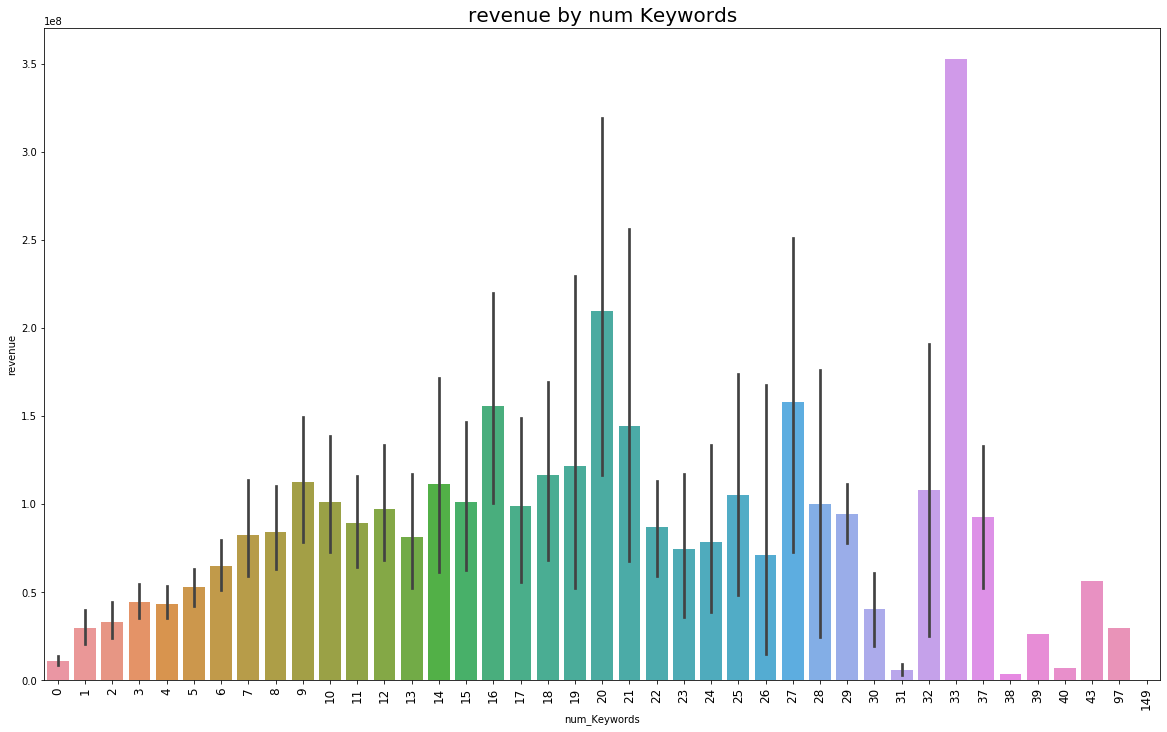

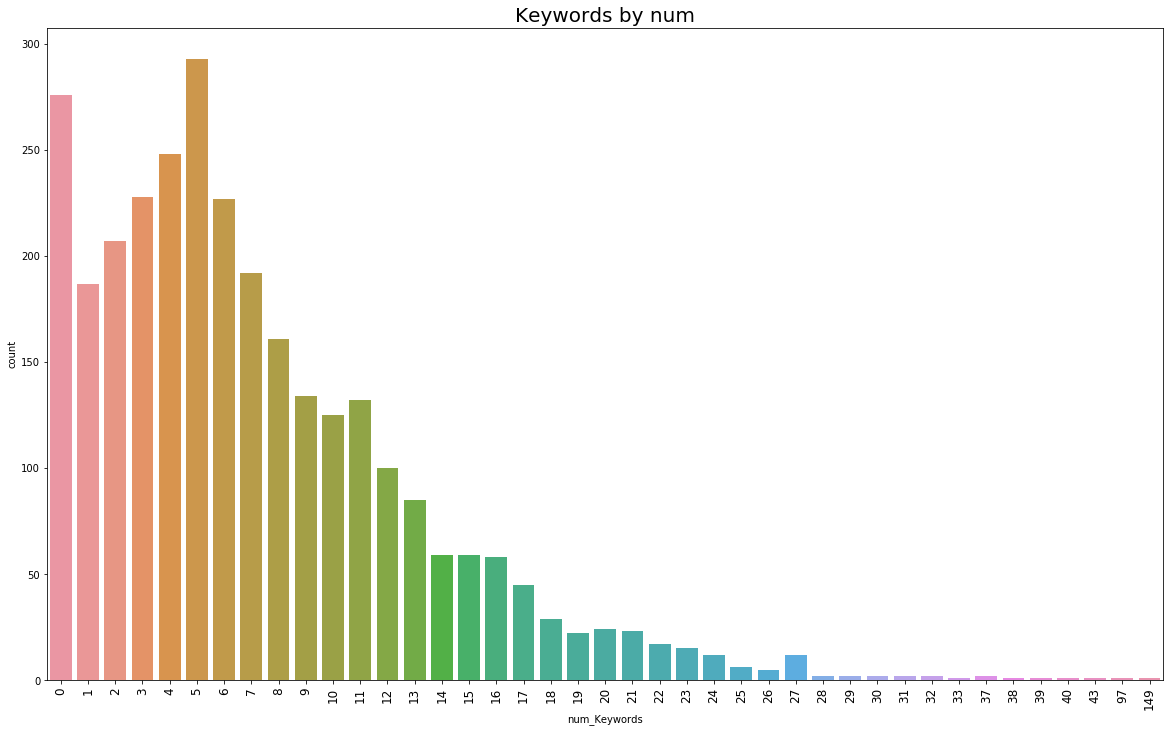

In [42]:
keyword_res = plot_multivalue_column(data, 'Keywords', Y='revenue', select=lambda x: x['name'], scatterplot=False, min_entries=50)

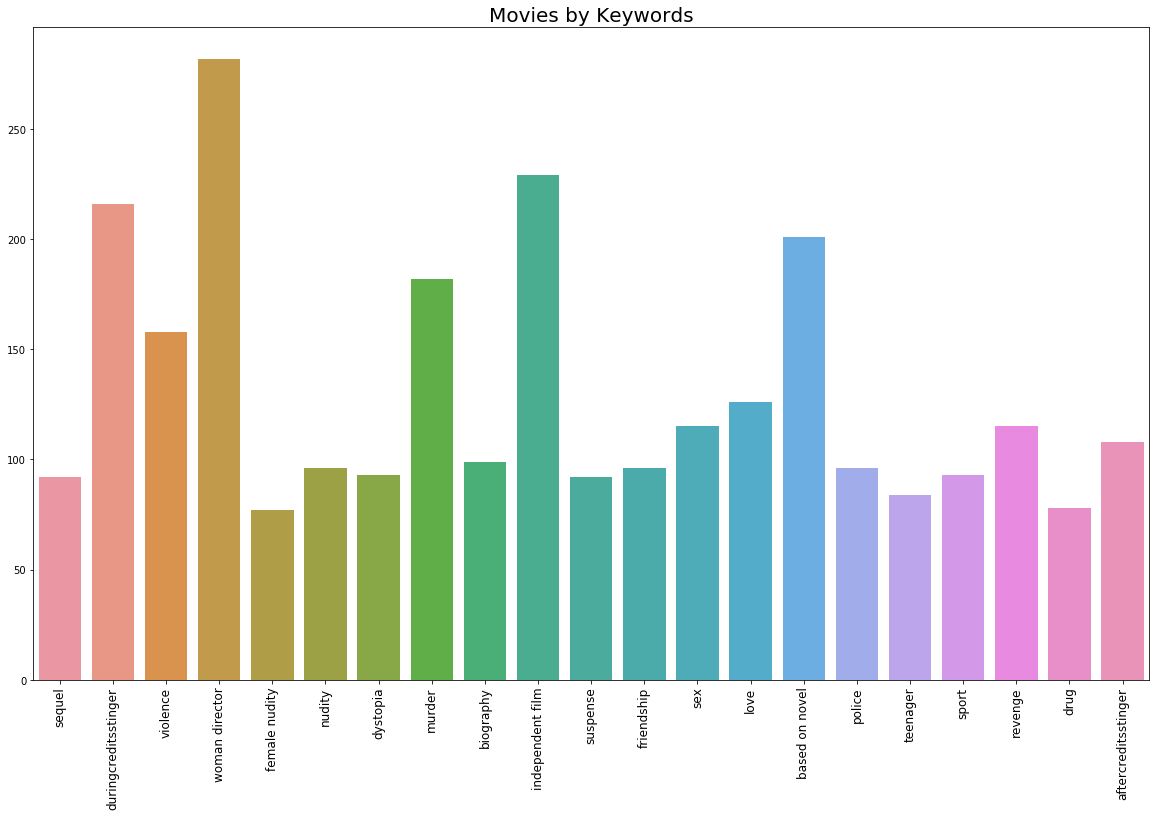

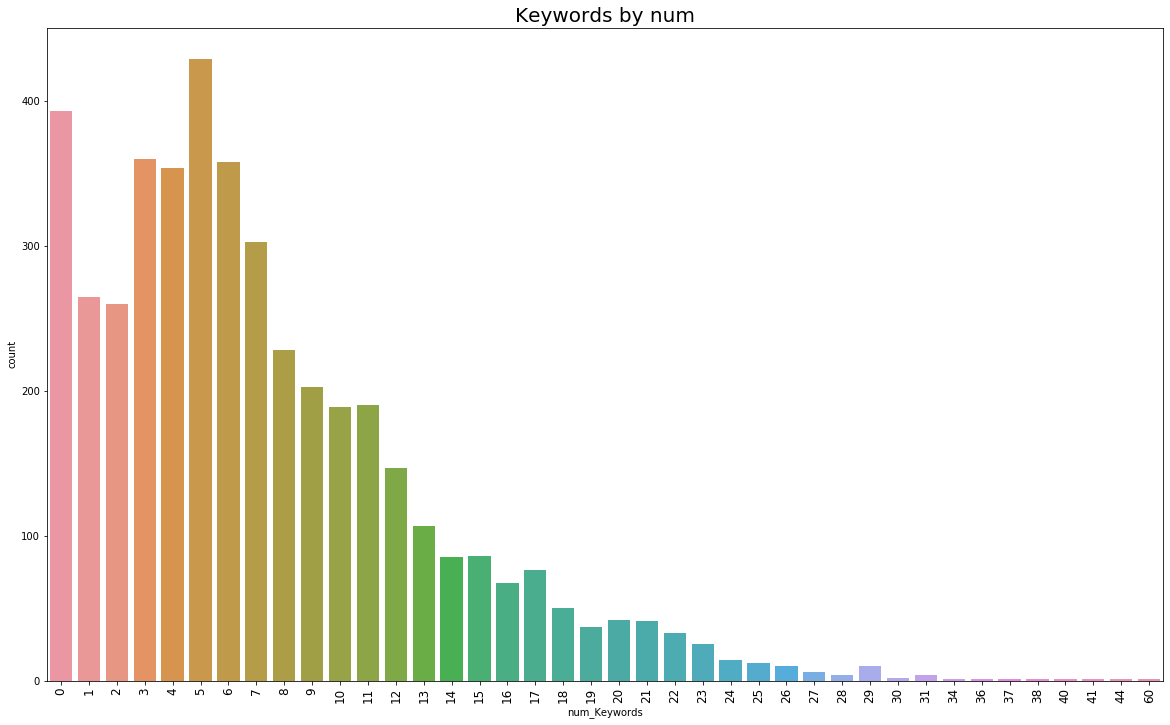

In [43]:
keyword_test_res = plot_multivalue_column(test, 'Keywords', select=lambda x: x['name'], scatterplot=False, list_entries=keyword_res)

In [44]:
attributes.extend(keyword_res)

In [45]:
attributes.append('num_Keywords')

## Release data

In [46]:
data['release_date'].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [47]:
releaseDate = pd.to_datetime(data['release_date'])

In [48]:
releaseDateTest = pd.to_datetime(test['release_date'])

In [49]:
data['release_year'] = releaseDate.dt.year

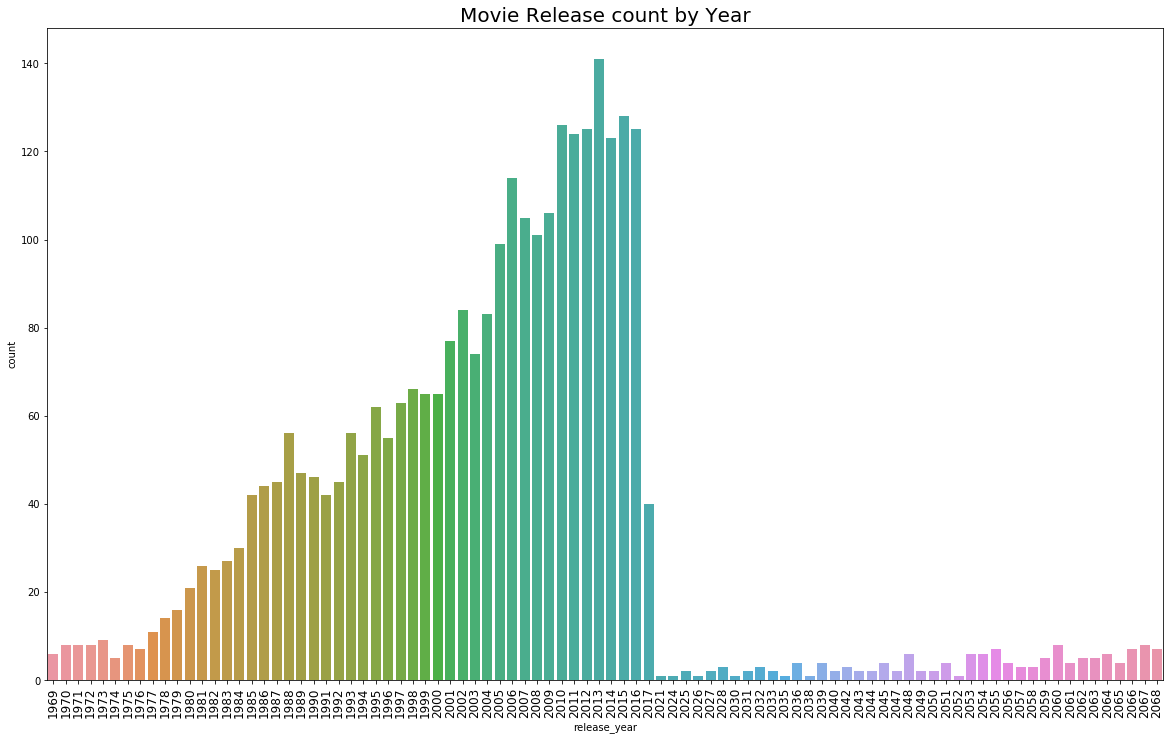

In [50]:
plt.figure(figsize=(20,12))
sns.countplot(data['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

We have some values in the future..

In [51]:
len(data[(data['release_year'] > 2017) & (data['status'] == 'Released')])

146

In [52]:
len(data[(data['release_year'] > 2017) & (data['status'] != 'Released')])

0

All "future" movies have already been released

In [53]:
data[(data['release_year'] > 2017) & (data['status'] == 'Released')].head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,title_same,has_homepage,is_collection,Keywords_list,sequel,duringcreditsstinger,violence,woman director,female nudity,nudity,dystopia,murder,biography,independent film,suspense,friendship,sex,love,based on novel,police,teenager,sport,revenge,drug,aftercreditsstinger,num_Keywords,release_year
39,40,NaN,3800000,"[{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...",NaN,tt0059418,en,Major Dundee,"During the last winter of the Civil War, caval...",3.055936,/bwLMwKun3RNn9rmcfMfJw11ofNh.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/7/65,123.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Major Dundee,"[{'id': 534, 'name': 'mexico'}, {'id': 1968, '...","[{'cast_id': 1, 'character': 'Major Amos Charl...","[{'credit_id': '52fe45f5c3a368484e078d7b', 'de...",14873,True,False,False,"[mexico, prisoners of war, apache, raid, confe...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5,2065
41,42,NaN,3000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0061512,en,Cool Hand Luke,When petty criminal Luke Jackson is sentenced ...,9.718713,/vDwphkloD7ToaDpKASAXGgHOclN.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",6/22/67,126.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What we've got here is failure to communicate.,Cool Hand Luke,"[{'id': 378, 'name': 'prison'}, {'id': 526, 'n...","[{'cast_id': 13, 'character': 'Luke Jackson', ...","[{'credit_id': '52fe428ac3a36847f8026d8d', 'de...",16217773,True,False,False,"[prison, rebel, loss of mother, harassment, im...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12,2067
51,52,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,/nc6FRAVC4a8o4podiFy2P5qI9ul.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",7/1/65,160.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333,True,False,False,"[slapstick, ensemble cast, automobile racing, ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5,2065
61,62,NaN,4000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0049875,en,Trapeze,"A pair of men try to perform the dangerous ""tr...",1.801071,/tAExVSQUlby56ATBlMnA2BrbA25.jpg,"[{'name': 'Joanna Productions', 'id': 5799}]","[{'iso_3166_1': 'US', 'name': 'United States o...",5/30/56,105.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,High...High...High...Above Them All! - in exci...,Trapeze,"[{'id': 291, 'name': 'circus'}, {'id': 180181,...","[{'cast_id': 2, 'character': 'Mike Ribble', 'c...","[{'credit_id': '52fe4594c3a36847f80cf3b9', 'de...",14400000,True,False,False,"[circus, trapeze artist]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,2056
68,69,NaN,2000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0056592,en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",14.284787,/gQg6sPYfNTUlf8wEtydzWl09RyR.jpg,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'US', 'name': 'United States o...",12/25/62,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,

The year was wrongly parsed..

In [54]:
releaseDate = releaseDate.apply(lambda x: x.replace(year=x.year - 100) if x.year > 2017 else x)

In [55]:
releaseDateTest = releaseDateTest.apply(lambda x: x.replace(year=x.year - 100) if x.year > 2017 else x)

In [56]:
data['release_year'] = releaseDate.dt.year

In [57]:
test['release_year'] = releaseDateTest.dt.year

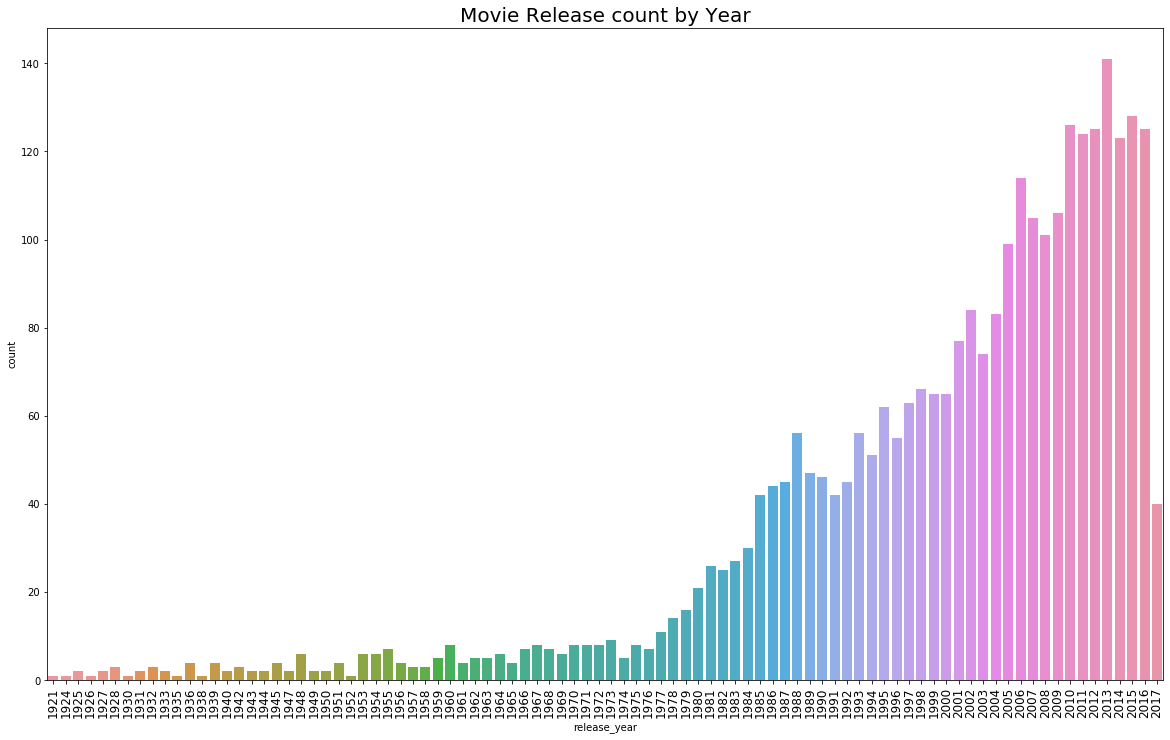

In [58]:
plt.figure(figsize=(20,12))
sns.countplot(data['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [59]:
data['release_month'] = releaseDate.dt.month

In [60]:
test['release_month'] = releaseDateTest.dt.month

In [61]:
data['release_day'] = releaseDate.dt.dayofweek

In [62]:
test['release_day'] = releaseDateTest.dt.dayofweek

In [63]:
data['release_quarter'] = releaseDate.dt.quarter

In [64]:
test['release_quarter'] = releaseDateTest.dt.quarter

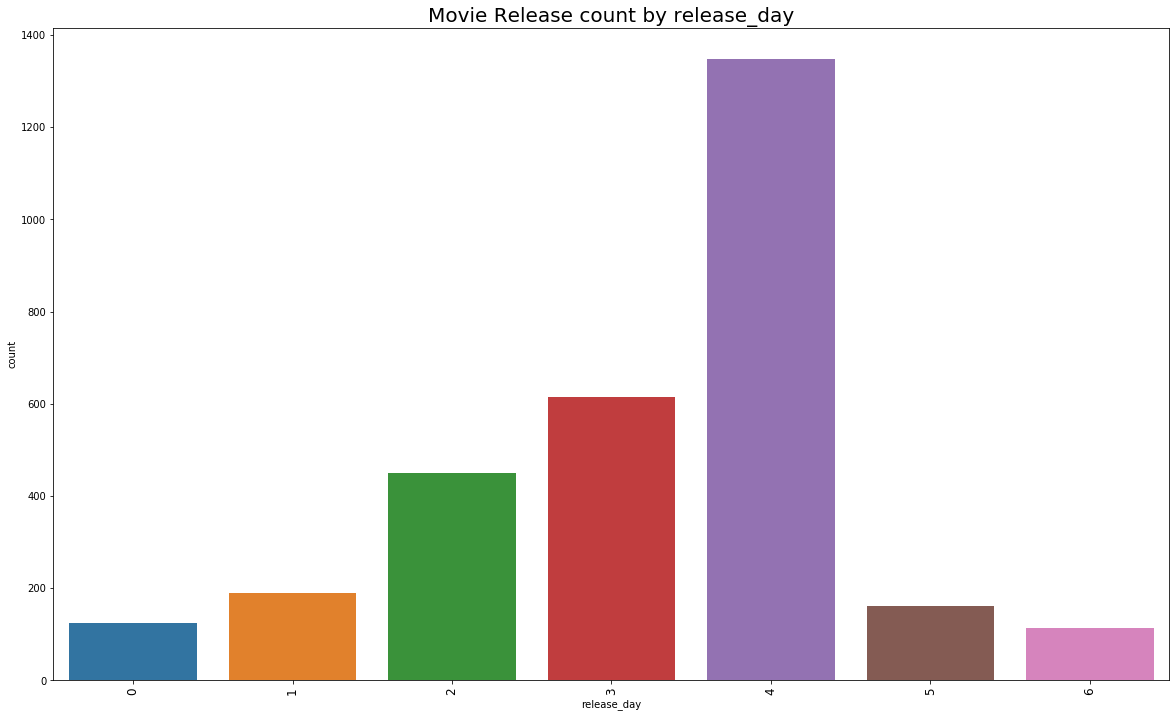

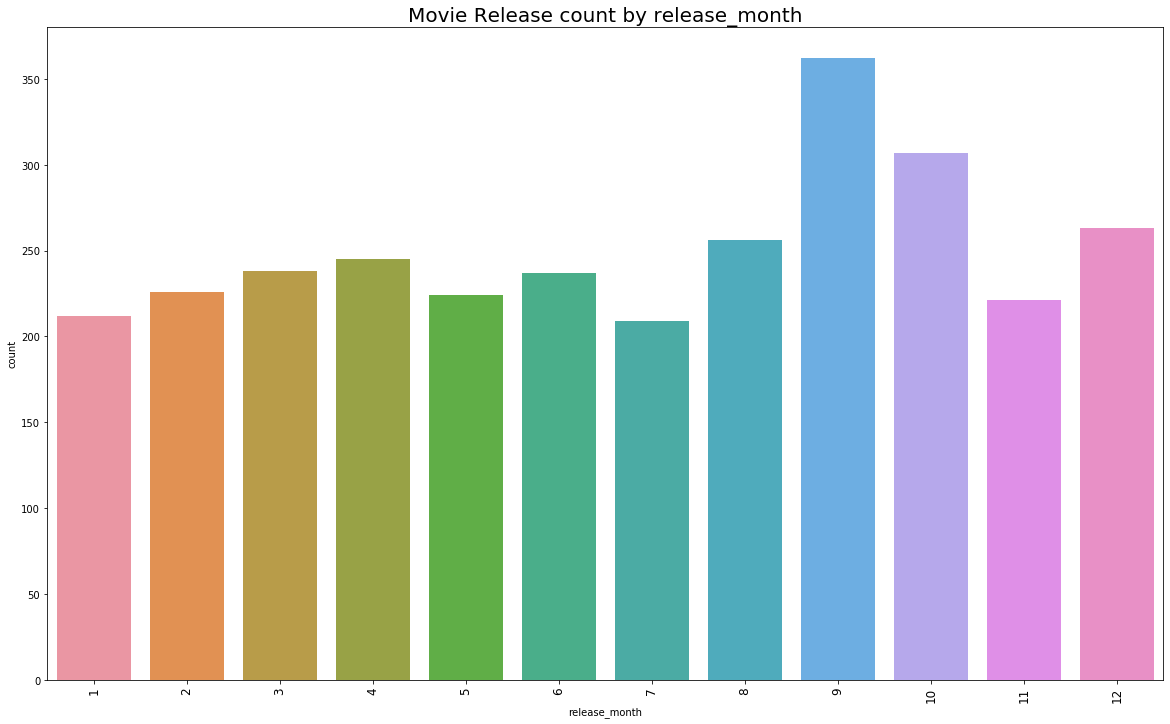

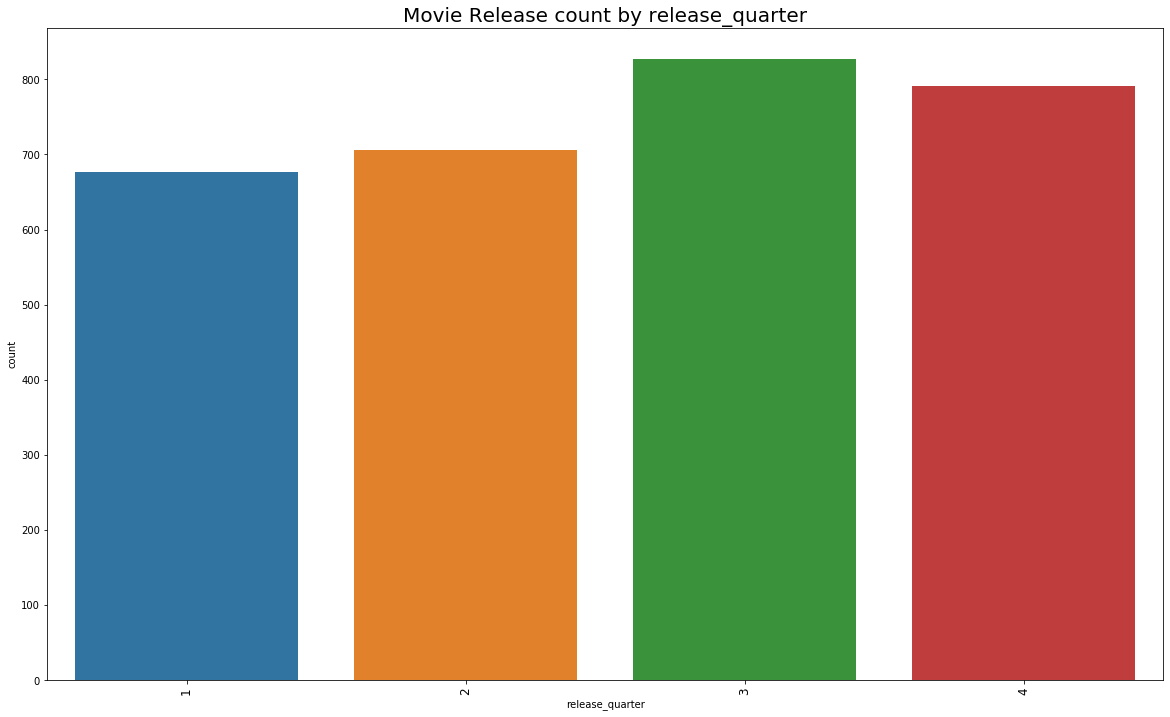

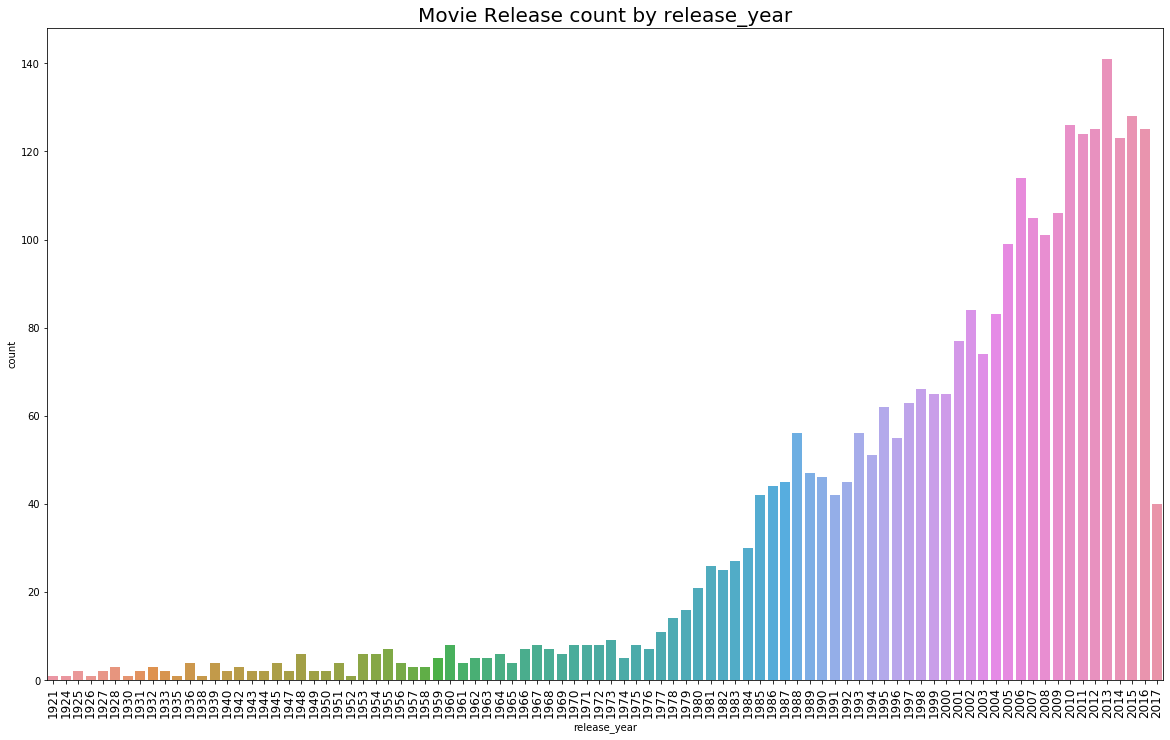

In [65]:
for d in ['release_day', 'release_month', 'release_quarter', 'release_year']:
    plt.figure(figsize=(20,12))
    sns.countplot(data[d].sort_values())
    plt.title("Movie Release count by {}".format(d),fontsize=20)
    loc, labels = plt.xticks()
    plt.xticks(fontsize=12,rotation=90)
    plt.show()

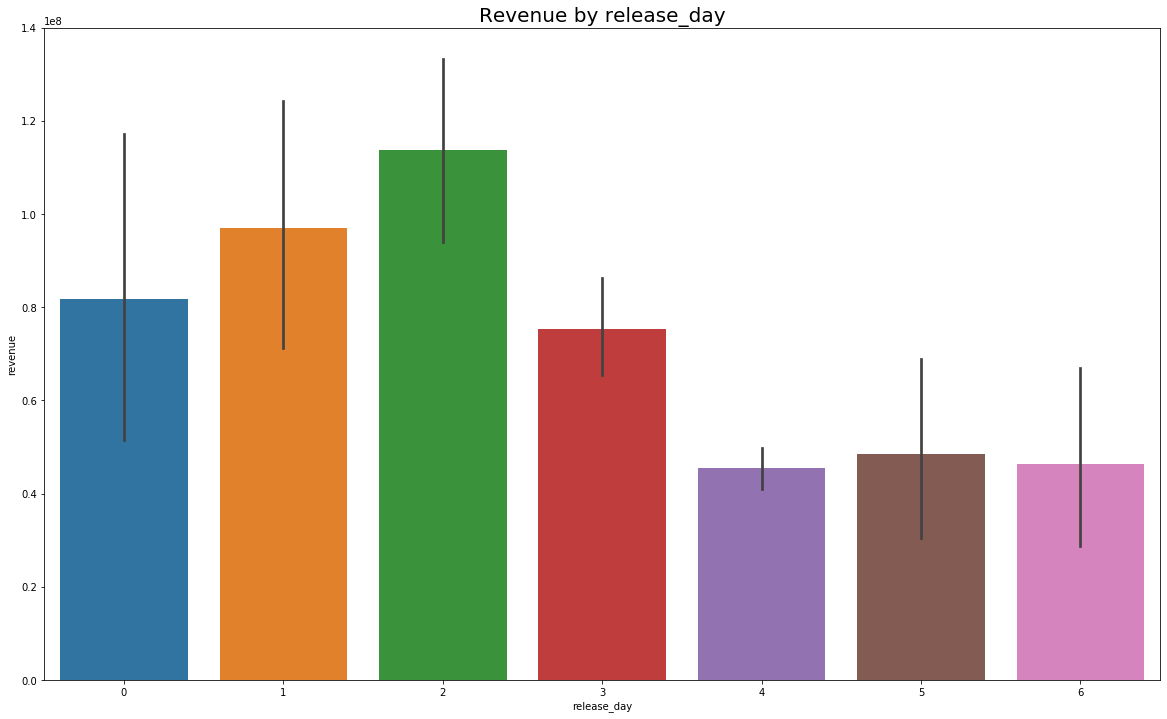

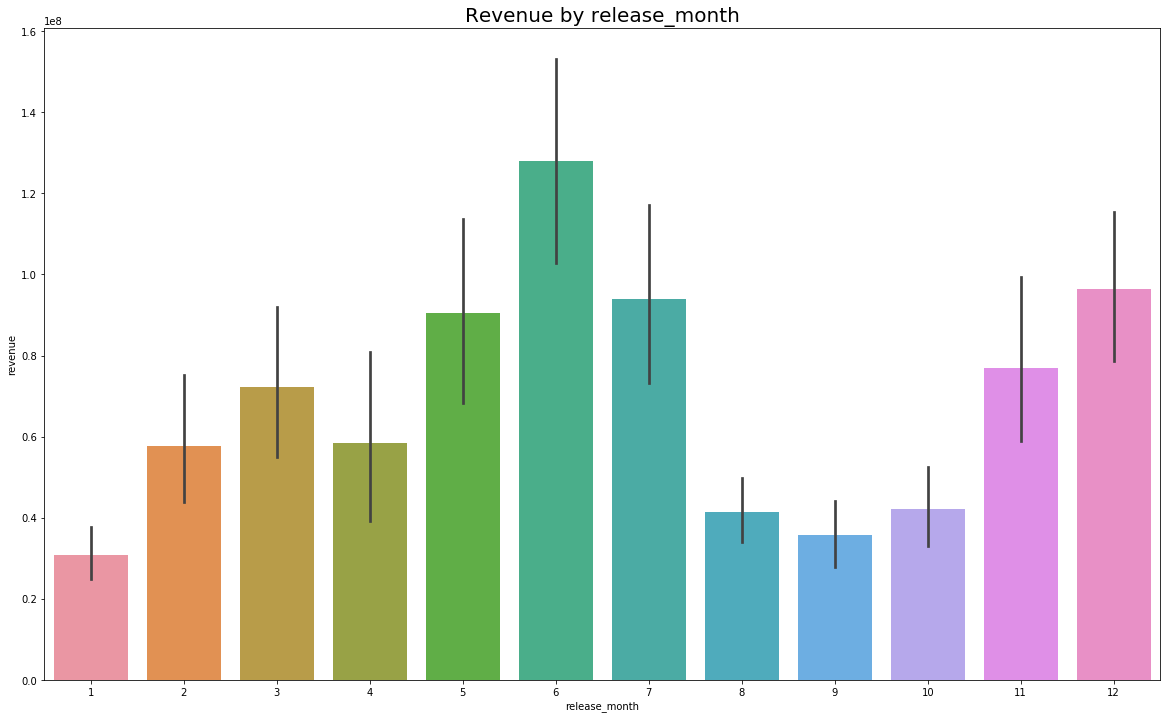

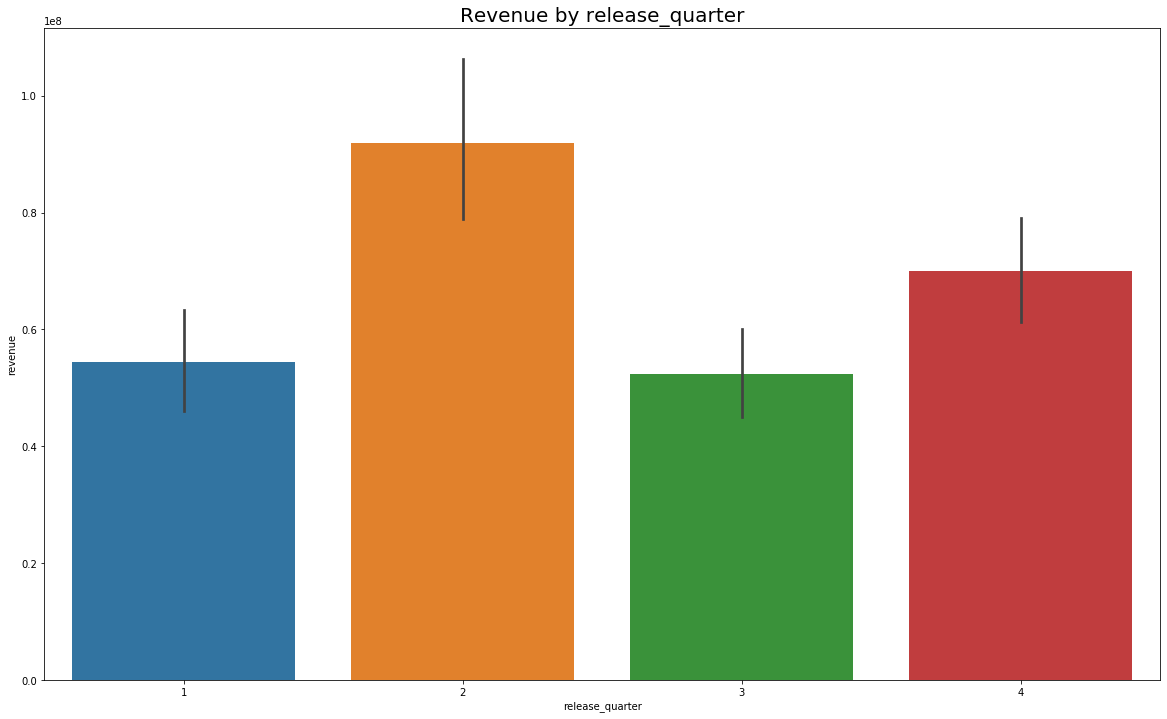

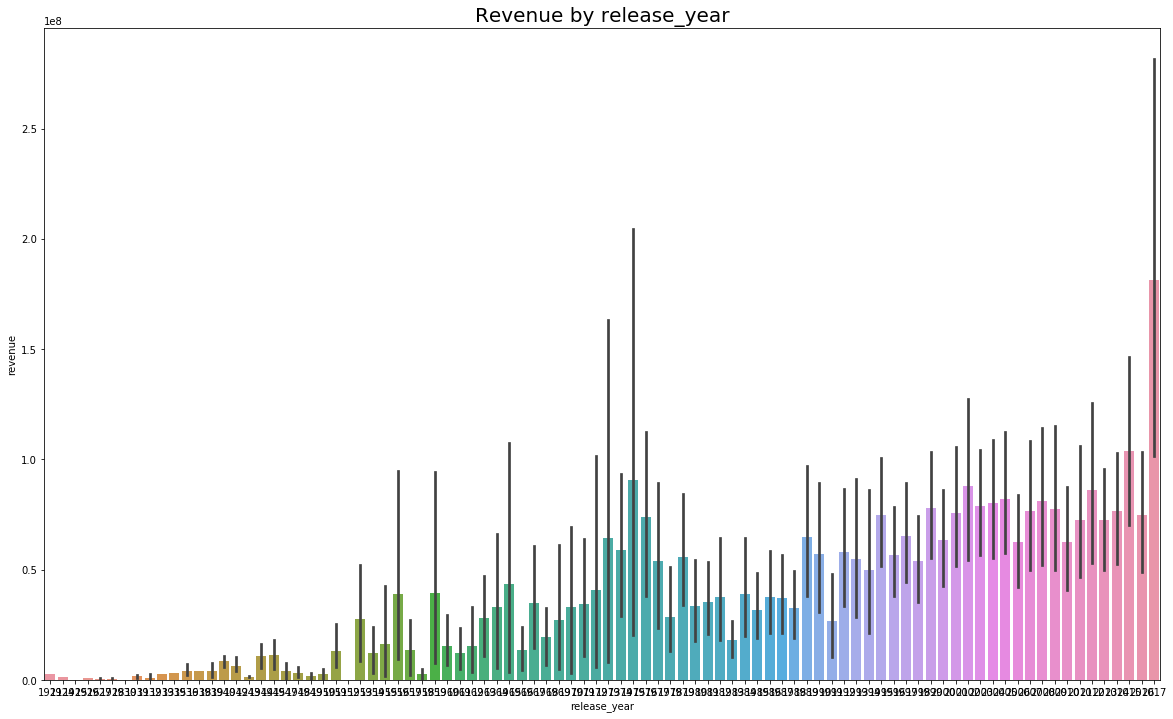

In [66]:
for d in ['release_day', 'release_month', 'release_quarter', 'release_year']:
    plt.figure(figsize=(20,12))
    sns.barplot(x=d, y='revenue', data=data)
    plt.title("Revenue by {}".format(d),fontsize=20)
    plt.show()

In [67]:
def inflate(num, duration, percent):
    return num * inflated(duration, percent)
def inflated(duration, percent):
    return (1 + percent)**duration

In [68]:
inflation = 0.01

In [69]:
data['inflated_revenue'] = data.apply(lambda row: inflate(row['revenue'], 2017 - row['release_year'], inflation), axis=1)

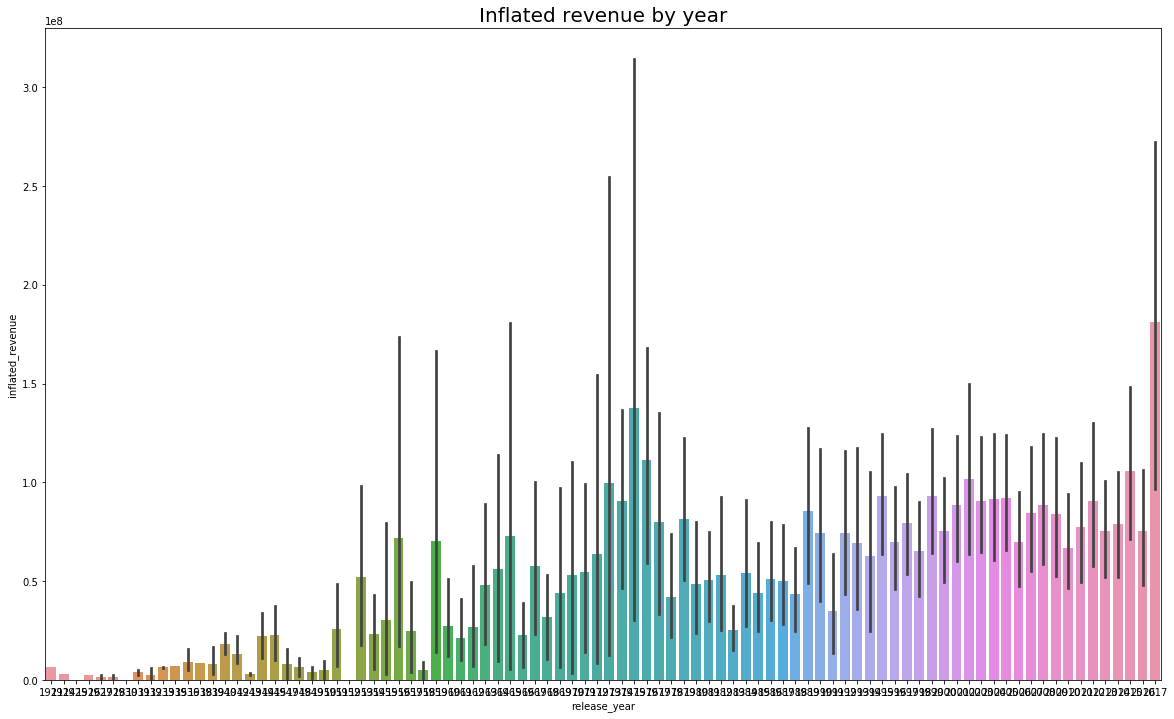

In [70]:
plt.figure(figsize=(20,12))
sns.barplot(x='release_year', y='inflated_revenue', data=data)
plt.title("Inflated revenue by year",fontsize=20)
plt.show()

In [71]:
attributes.extend(['release_year', 'release_quarter', 'release_day', 'release_month'])

## Budget

In [72]:
len(data[data['budget'] == 0.0])

812

In [73]:
len(test[test['budget'] == 0.0])

1211

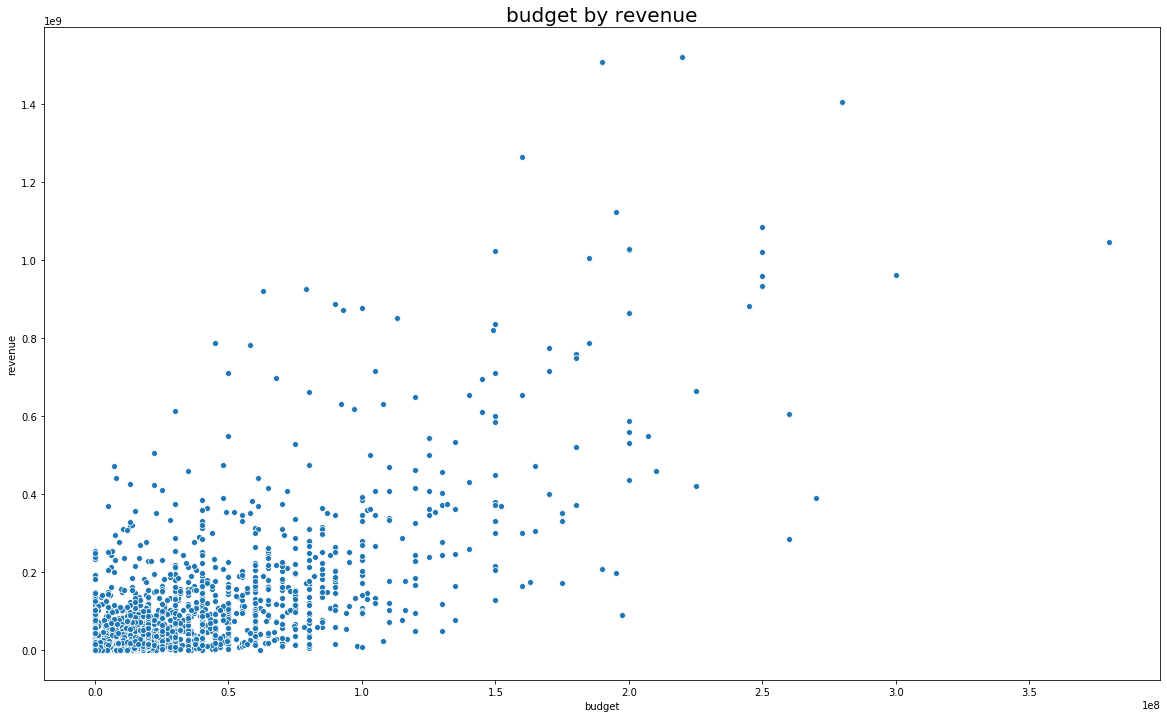

In [74]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='budget', y='revenue', data=data)
plt.title("budget by revenue",fontsize=20)
plt.show()

In [75]:
attributes.append('budget')

## Popularity

In [76]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='release_year', y='popularity', data=data_total)
plt.title("popularity by revenue",fontsize=20)
plt.show()

NameError: name 'data_total' is not defined

<Figure size 1440x864 with 0 Axes>

In [ ]:
data_total = data.append(test)
#data[data['popularity']> 50]


In [ ]:
data_total[data_total['popularity']> 50]

In [ ]:
attributes.append('popularity')

In [ ]:
data.sort_values(by=['revenue'], ascending = False)

## Genres

In [ ]:
genres_res = plot_multivalue_column(data, 'genres', Y='revenue', select=lambda x: x['name'], scatterplot=False, min_entries=50)

In [ ]:
genres_test_res = plot_multivalue_column(test, 'genres', select=lambda x: x['name'], scatterplot=False, list_entries=genres_res)

Revenue compared to genres, NOTE: movies with multiple genres are shown multiple times

In [ ]:
attributes.extend(genres_res)

In [ ]:
attributes.append('num_genres')

### Spoken language

In [ ]:
spoken_languages_res = plot_multivalue_column(data, 'spoken_languages', Y='revenue', select=lambda x: x['name'], min_entries=100, scatterplot=False)

In [ ]:
spoken_languages_test_res = plot_multivalue_column(test, 'spoken_languages', select=lambda x: x['name'], scatterplot=False, list_entries=spoken_languages_res)

NOTE: Movies with multiple langauges are shown multiple times

In [ ]:
attributes.extend(spoken_languages_res)

In [ ]:
attributes.append('num_spoken_languages')

### Production companies

In [ ]:
production_companies_res = plot_multivalue_column(data, 'production_companies', Y='revenue', select=lambda x: x['name'], min_entries=60, scatterplot=False)

In [ ]:
production_companies_test_res = plot_multivalue_column(test, 'production_companies', select=lambda x: x['name'], min_entries=60, scatterplot=False, list_entries=production_companies_res)

In [ ]:
attributes.extend(production_companies_res)

In [ ]:
attributes.append('num_production_companies')

## Production countries

In [ ]:
production_countries_res = plot_multivalue_column(data, 'production_countries', Y='revenue', select=lambda x: x['name'], min_entries=100, scatterplot=False)

In [ ]:
production_countries_test_res = plot_multivalue_column(test, 'production_countries', select=lambda x: x['name'], min_entries=60, scatterplot=False, list_entries=production_countries_res)

In [ ]:
attributes.extend(production_countries_res)

In [ ]:
attributes.append('num_production_countries')

## Crew

In [ ]:
crew_res = plot_multivalue_column(data, 'crew', Y='revenue', select=lambda x: x['name'], filt=lambda x: x['job'] == 'Director', min_entries=5, scatterplot=False)

In [ ]:
crew_test_res = plot_multivalue_column(test, 'crew', select=lambda x: x['name'], filt=lambda x: x['job'] == 'Director', min_entries=5, scatterplot=False, list_entries=crew_res)

Try to group directors

In [ ]:
def get_director(df):
    crew = df['crew'].apply(lambda x: eval(x) if not pd.isnull(x) else [])
    directors = crew.apply(lambda crw: list(filter(lambda x: 'job' in x and x['job'] == 'Director', crw)))
    director = directors.apply(lambda dir: dir[0] if len(dir) >= 1 else None)
    return director.apply(lambda x: x['name'] if x else None)
    

In [ ]:
data['director'] = get_director(data)

In [ ]:
test['director'] = get_director(test)

In [ ]:
dir_total = list(data['director']) + list(test['director'])

In [ ]:
train_dirs = list(dict.fromkeys(get_director(data)))

In [ ]:
test_dirs = list(dict.fromkeys(get_director(test)))

In [ ]:
both_dirs = dict.fromkeys(get_director(test) + get_director(data))

In [ ]:
len(train_dirs)

In [ ]:
len(test_dirs)

In [ ]:
len(both_dirs)

In [ ]:
min_samples = 3

In [ ]:
mean_dir_rev = [(dir, data[data['director'] == dir]['revenue'].mean()) for dir in train_dirs if len(data[data['director'] == dir]) >= min_samples]

In [ ]:
median_dir_rev = [(dir, data[data['director'] == dir]['revenue'].median()) for dir in train_dirs if len(data[data['director'] == dir]) >= min_samples]

In [ ]:
dict_mean_dir_rev = dict(mean_dir_rev)

In [ ]:
dict_median_dir_rev = dict(median_dir_rev)

In [ ]:
len(list(filter(lambda x: x in dict_mean_dir_rev, test_dirs)))

In [ ]:
len(list(filter(lambda x: x in dict_mean_dir_rev, train_dirs)))

In [ ]:
def director_num_total(dir):
    return dir_total.count(dir)

In [ ]:
def director_in_dic(dir):
    return director_num_total(dir) > 0

In [ ]:
data['director_in_dic'] = data['director'].apply(lambda x: director_in_dic(x))

In [ ]:
data['director_movies'] = data['director'].apply(lambda x: director_num_total(x))

In [ ]:
test['director_in_dic'] = test['director'].apply(lambda x: director_in_dic(x))

In [ ]:
test['director_movies'] = test['director'].apply(lambda x: director_num_total(x))

In [ ]:
attributes.extend(crew_res)

In [ ]:
attributes.append('num_crew')

In [ ]:
attributes.extend(['director_in_dic','director_movies'])

## Cast

In [ ]:
cast_res = plot_multivalue_column(data, 'cast', Y='revenue', select=lambda x: x['name'], filt=lambda x: x['order'] < 5, min_entries=15, scatterplot=False)

In [ ]:
cast_test_res = plot_multivalue_column(test, 'cast', select=lambda x: x['name'], filt=lambda x: x['order'] < 5, min_entries=15, scatterplot=False, list_entries=cast_res)

In [ ]:
gender_res = plot_multivalue_column(data, 'cast', Y='revenue', select=lambda x: x['gender'], filt=lambda x: x['order'] == 0, scatterplot=False, prefix='gender_')

In [ ]:
gender_test_res = plot_multivalue_column(test, 'cast', select=lambda x: x['gender'], filt=lambda x: x['order'] == 0, scatterplot=False, prefix='gender_', list_entries=gender_res)

In [ ]:
def gender_dist(df):
    cast = df['cast'].apply(lambda x: eval(x) if not pd.isnull(x) else [])
    genders = cast.apply(lambda cas: list(filter(lambda gender: gender != 0, [x['gender'] for x in cas])))
    dist = genders.apply(lambda gen: 0.5 if len(gen) == 0 else len(list(filter(lambda g: g == 1, gen))) / len(gen))
    return dist

In [ ]:
data['gender_dist'] = gender_dist(data)

In [ ]:
test['gender_dist'] = gender_dist(test)

In [ ]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='gender_dist', y='revenue', data=data)
plt.title("gender dist by revenue",fontsize=20)
plt.show()

In [ ]:
attributes.extend(cast_res)

In [ ]:
attributes.append('num_cast')

In [ ]:
attributes.extend(gender_res)

In [ ]:
attributes.append('gender_dist')

NOTE: 2 male, 1 female, 0 ?

## Original langauges

In [ ]:
len(list(dict.fromkeys(list(data['original_language']))))

In [ ]:
len(list(dict.fromkeys(list(test['original_language']))))

In [ ]:
len(list(dict.fromkeys(list(test['original_language']) + list(data['original_language']))))

In [ ]:
original_languages = list(dict.fromkeys(list(test['original_language']) + list(data['original_language'])))

In [ ]:
org_lang_count = map(lambda l: (len(data[data['original_language'] == l]) + len(data[data['original_language'] == l]), l), original_languages)

In [ ]:
org_langs = list(map(lambda x: x[1], filter(lambda x: x[0] > 50, org_lang_count)))

In [ ]:
org_langs

In [ ]:
for lang in org_langs:
    data['org_lang_' + lang] = data['original_language'] == lang
    test['org_lang_' + lang] = test['original_language'] == lang

In [ ]:
org_langs_cols = list(map(lambda x: 'org_lang_'+ x, org_langs))

In [ ]:
attributes.extend(org_langs_cols)

## Checking correlation

In [ ]:
corr = data.corr()["revenue"]

In [ ]:
corr.sort_values(ascending=False)

## Settings up data for models

In [ ]:
def get_cols(df, keep_rows):
    data = df.copy()
    drop_cols = [col for col in df.columns if not col in keep_rows]
    data = data.drop(columns=drop_cols)
    return data
        
    

In [ ]:
def test_regressor(reg, X, y):
    scores = np.sqrt(-cross_val_score(reg, X, y, scoring="neg_mean_squared_error", cv=5, n_jobs=-1))
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Std deviation", scores.std())
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)

    return scores

In [ ]:
transformed_data = get_cols(data, attributes) * 1 # * 1 makes True/False become 1/0

In [ ]:
transformed_data.head()

In [ ]:
y=data['revenue'].apply(np.log1p)

Because of the skewed revenue data we apply log to it

In [ ]:
transformed_test= get_cols(test, attributes) * 1

In [ ]:
rf = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=100)

In [ ]:
test_regressor(rf, transformed_data, y)

In [ ]:
rf.fit(transformed_data, y)
perm = PermutationImportance(rf, random_state=RANDOM_STATE).fit(transformed_data, y)
eli5.show_weights(perm, feature_names = transformed_data.columns.tolist())

In [ ]:
gb = GradientBoostingRegressor(random_state=RANDOM_STATE, n_estimators=100)

In [ ]:
test_regressor(gb, transformed_data, y)

In [ ]:
gb.fit(transformed_data, y)
perm = PermutationImportance(gb, random_state=RANDOM_STATE).fit(transformed_data, y)
eli5.show_weights(perm, feature_names = transformed_data.columns.tolist())

In [ ]:
hgb = HistGradientBoostingRegressor(random_state=RANDOM_STATE)

In [ ]:
test_regressor(hgb, transformed_data, y)

In [ ]:
hgb.fit(transformed_data, y)
perm = PermutationImportance(hgb, random_state=RANDOM_STATE).fit(transformed_data, y)
eli5.show_weights(perm, feature_names = transformed_data.columns.tolist())

## Trying other models

Getting test and training data ready

In [ ]:
x = transformed_data

In [ ]:
pred_x = transformed_test

In [ ]:
len(x.loc[0])

In [ ]:
len(pred_x.loc[0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)

For finding good parameters hyperopt will be used

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, space_eval

In [ ]:
def search(x, y, x_test, y_test, objective, param_space, max_evals):
    trials = Trials()
    best = fmin(fn=partial(objective, x, y, x_test, y_test), space=param_space, algo=tpe.suggest, 
            max_evals=max_evals, trials=trials)
    return space_eval(param_space, best)

## Trying out lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
def params_lgb(args):
    return {
         'objective':'regression',
         'num_leaves' : args['num_leaves'],
         'learning_rate' : args['learning_rate'],
         'min_data_in_leaf' : args['min_data_in_leaf'],
         'max_depth' : args['max_depth'],
         'feature_fraction':0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         'lambda_l1': 0.2,
         "bagging_seed": RANDOM_STATE,
         "metric": 'rmse',
         "random_state" : RANDOM_STATE
    }

def objective_lgb(x, y, x_test, y_test, args):
    train_data = lgb.Dataset(x, y)
    validation_data = lgb.Dataset(x_test, y_test, reference=train_data)
    params = params_lgb(args)
    
    gbm = lgb.train(params=params,
                    train_set=train_data,
                    num_boost_round=5000,
                    valid_sets=validation_data,
                    verbose_eval=-1,
                    early_stopping_rounds=50)
    gbm_y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
    score = np.sqrt(mean_squared_error(y_test, gbm_y_pred))
    print("params: {}, score: {}".format(args, score))
    return {'loss': score, 'status': STATUS_OK}
    
    

In [ ]:
param_space_gbm = {
    'max_depth': hp.choice('max_depth', [8, 9, 10, 11, 12, 13]),
    'num_leaves': hp.choice('num_leaves', [10, 15, 20, 30, 35, 40, 45, 50]),
    'min_data_in_leaf': hp.choice('min_data_in_leaf', [5, 10, 20, 30]),
    'learning_rate': hp.choice('learning_rate', [0.005, 0.01, 0.05, 0.1]),
}

In [ ]:
best_params_lgb = search(X_train, y_train, X_test, y_test, objective_lgb, param_space_gbm, 20)

## xgboost

In [ ]:
import xgboost as xgb

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

We get an annoying warning which I found no way of fixing, so we just hide it....

In [ ]:
def params_xgb(args):
    return {
        'max_depth': args['max_depth'],
        'learning_rate': args['learning_rate'],
        'num_estimators': args['num_estimators'],
        'gamma': args['gamma'],
        'min_child_weight': args['min_child_weight'],
        'subsample': args['subsample'],
        'colsample_bytree': args['colsample_bytree']
        
    }

def objective_xgb(x, y, x_test, y_test, args):
    params = params_xgb(args)
    dtrain = xgb.DMatrix(x, label=y)
    dtest = xgb.DMatrix(x_test, label=y_test)
    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    
    num_round = 100
    bst = xgb.train(params, dtrain, num_round, evallist,verbose_eval=False)
    
    xgb_y_pred = bst.predict(dtest)
    
    score = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
    print("params: {}, score: {}".format(args, score))
    return {'loss': score, 'status': STATUS_OK}

In [ ]:
param_space_xgb = {
    'max_depth': hp.choice('max_depth', [5,6,7, 8, 9, 10]),
    'min_child_weight': hp.choice('min_child_weight', [1, 5, 10, 20]),
    'gamma': hp.choice('gamma', [0.0, 1.0, 1.25, 1.5, 1.6]),
    'subsample': hp.choice('subsample', [0.5, 0.6, 1.0]),
    'colsample_bytree': hp.choice('colsample_bytree', [0.4,0.45, 0.5, 0.55, 0.6, 0.8, 0.9]),
    'learning_rate': hp.choice('learning_rate', [0.05, 0.1, 0.15, 0.2]),
    'num_estimators': hp.choice('num_estimators', [50, 100, 500, 600])
}

In [ ]:
best_params_xgb = search(X_train, y_train, X_test, y_test, objective_xgb, param_space_xgb, 20)

## trying catboost

In [ ]:
import catboost

In [ ]:
def params_cat(args):
    return {
        'iterations': 10000,
        'max_depth': args['max_depth'],
        'colsample_bylevel': args['colsample_bylevel'],
        'learning_rate': args['learning_rate'],
        'eval_metric' : 'RMSE',
        'early_stopping_rounds': 200,
        'random_seed': RANDOM_STATE
    }
    

def objective_cat(x, y, x_test, y_test, args):
    params = params_cat(args)
    cb = catboost.CatBoostRegressor(**params)
    cb.fit(x, y, verbose=False, use_best_model=True, eval_set=(x_test, y_test))
    
    cb_y_pred = cb.predict(x_test)
    score = np.sqrt(mean_squared_error(y_test, cb_y_pred))
    print("params: {}, score: {}".format(args, score))
    return {'loss': score, 'status': STATUS_OK}
    

In [ ]:
param_space_cat = {
    'learning_rate':       hp.choice('learning_rate',       np.arange(0.1, 0.31, 0.05)),
    'max_depth':           hp.choice('max_depth',           np.arange(5, 7, 1, dtype=int)),
    'colsample_bylevel':   hp.choice('colsample_bylevel',   np.arange(0.4, 0.81, 0.05))
}

In [ ]:
best_params_cat = search(X_train, y_train, X_test, y_test, objective_cat, param_space_cat, 20)

## Combining

In [ ]:
best_params_lgb

In [ ]:
best_params_cat

In [ ]:
best_params_xgb

In [ ]:
gkf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE).split(X=x, y=y)
avg_split = [0, 0, 0]

total_pred = np.zeros(len(pred_x))

for i, (trn, val) in enumerate(gkf):
    print("fold {}".format(i + 1))
    trn_x = x.loc[trn, :]
    trn_y = y[trn]
    val_x = x.loc[val, :]
    val_y = y[val]
    
    # lightgbm
    params = params_lgb(best_params_lgb)
    train_data = lgb.Dataset(trn_x, trn_y)
    validation_data = lgb.Dataset(val_x, val_y, reference=train_data)
    gbm = lgb.train(params=params,
                    train_set=train_data,
                    num_boost_round=5000,
                    valid_sets=validation_data,
                    verbose_eval=-1,
                    early_stopping_rounds=50)
    gbm_pred = gbm.predict(val_x, num_iteration=gbm.best_iteration)
    gbm_score = np.sqrt(mean_squared_error(val_y, gbm_pred))
    print("Lightgbm score: {}".format(gbm_score))
    
    # XGBoost
    params = params_xgb(best_params_xgb)
    dtrain = xgb.DMatrix(trn_x, label=trn_y)
    dtest = xgb.DMatrix(val_x, label=val_y)
    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    
    num_round = 100
    bst = xgb.train(params, dtrain, num_round, evallist,verbose_eval=False)
    xgb_pred = bst.predict(dtest)
    xgb_score = np.sqrt(mean_squared_error(val_y, xgb_pred))
    print("XGBoost score: {}".format(xgb_score))
    
    
    
    # CatBoost
    params = params_cat(best_params_cat)
    cb = catboost.CatBoostRegressor(**params)
    cb.fit(trn_x, trn_y, verbose=False, use_best_model=True, eval_set=(val_x, val_y))
    cb_pred = cb.predict(val_x)
    cb_score = np.sqrt(mean_squared_error(val_y, cb_pred))
    print("Catboost score: {}".format(cb_score))
    
    
    
    # Combining equally
    equal_pred = (cb_pred + xgb_pred + gbm_pred) / 3
    equal_score = np.sqrt(mean_squared_error(val_y, equal_pred))
    print("Combined equally score: {}".format(equal_score))
    
    # Combined optimally
    ys = []
    
    
    for x1 in np.arange(10):
        for x2 in np.arange(10):
            for x3 in np.arange(10):
                x_sum = x1 + x2 + x3
                if x_sum != 0:
                    f1 = float(x1) / x_sum
                    f2 = float(x2) / x_sum
                    f3 = float(x3) / x_sum
                    pred = gbm_pred * f1 + xgb_pred * f2 + cb_pred * f3
                    score = np.sqrt(mean_squared_error(val_y, pred))
                    ys.append(((f1, f2, f3), score))
    
    ys.sort(key=lambda x: x[1])
    print("Optimal combined score: {} with {}".format(ys[0][1], ys[0][0]))
    avg_split[0] += ys[0][0][0]
    avg_split[1] += ys[0][0][1]
    avg_split[2] += ys[0][0][2]
    
    
    total_pred += gbm.predict(pred_x, num_iteration=gbm.best_iteration) * ys[0][0][0]
    
    dpred = xgb.DMatrix(pred_x)
    total_pred += bst.predict(dpred) * ys[0][0][1]
    
    total_pred += cb.predict(pred_x) * ys[0][0][2]
    
total_pred /= 5
avg_split[0] /= 5
avg_split[1] /= 5
avg_split[2] /= 5

In [ ]:
avg_split

In [ ]:
cv_pred = np.expm1(total_pred)

In [ ]:
pd.DataFrame({'id': test.id, 'revenue': cv_pred}).to_csv('cv_submission.csv', index=False)

In [ ]:
# lightgbm
params = params_lgb(best_params_lgb)
train_data = lgb.Dataset(X_train, y_train)
validation_data = lgb.Dataset(X_test, y_test, reference=train_data)
gbm = lgb.train(params=params,
                train_set=train_data,
                num_boost_round=5000,
                valid_sets=validation_data,
                verbose_eval=-1,
                early_stopping_rounds=50)
gbm_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
gbm_score = np.sqrt(mean_squared_error(y_test, gbm_pred))
print("Lightgbm score: {}".format(gbm_score))

# XGBoost
params = params_xgb(best_params_xgb)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 100
bst = xgb.train(params, dtrain, num_round, evallist,verbose_eval=False)
xgb_pred = bst.predict(dtest)
xgb_score = np.sqrt(mean_squared_error(y_test, xgb_pred))
print("XGBoost score: {}".format(xgb_score))



# CatBoost
params = params_cat(best_params_cat)
cb = catboost.CatBoostRegressor(**params)
cb.fit(X_train, y_train, verbose=False, use_best_model=True, eval_set=(X_test, y_test))
cb_pred = cb.predict(X_test)
cb_score = np.sqrt(mean_squared_error(y_test, cb_pred))
print("Catboost score: {}".format(cb_score))


avg_pred = gbm_pred * avg_split[0] + xgb_pred * avg_split[1] + cb_pred * avg_split[2]
avg_score = np.sqrt(mean_squared_error(y_test, avg_pred))
print("Average score: {}".format(avg_score))


gbm_pred = gbm.predict(pred_x, num_iteration=gbm.best_iteration)

dpred = xgb.DMatrix(pred_x)
xgb_pred = bst.predict(dpred)
    
cb_pred = cb.predict(pred_x)

avg_pred = gbm_pred * avg_split[0] + xgb_pred * avg_split[1] + cb_pred * avg_split[2]



pd.DataFrame({'id': test.id, 'revenue': np.expm1(avg_pred)}).to_csv('avg_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': np.expm1(gbm_pred)}).to_csv('gbm_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': np.expm1(xgb_pred)}).to_csv('xgb_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': np.expm1(cb_pred)}).to_csv('cb_submission.csv', index=False)




## Uploading submissions to Kaggle

In [ ]:
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f cv_submission.csv -m "Cv"')
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f avg_submission.csv -m "Avg"')
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f gbm_submission.csv -m "lightgbm"')
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f xgb_submission.csv -m "xgboost"')
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f cb_submission.csv -m "catboost"')
